# Q1. NLP Task Definitions and Real-World Examples

### **Text Classification**
Text classification is a **supervised learning** task where algorithms assign predefined labels (e.g., spam or not spam) to text based on its content. It is the process of categorizing texts (e.g., tweets, news articles, customer reviews) into organized groups.
It is commonly used in:
- **Sentiment Analysis**: Analyzes opinions in text (e.g., reviews, tweets) to determine polarity. It can be binary (positive/negative) or multi-class (fine-grained emotional intensities)
- **News categorization**: Classifies news content to help users find relevant information, track trends, or receive real-time recommendations based on interests
- **Topic Analysis**: Identifies the main themes or subjects of a text, such as whether a product review discusses “customer support” or “usability.”
- **Extractive QA**: Selects correct answers from existing text spans.
- **Natural language inference (NLI)**: Determines if a hypothesis can be inferred from a given premise. Common labels include entailment, contradiction, or neutral.

(*Minaee et al., 2021*).

---

### **Text Clustering**
Text clustering is an **unsupervised learning** technique that aims to group a collection of text documents into cohesive and distinct clusters based on their similarity. The core idea is that documents within the same cluster share similar themes or content and documents in different clusters are as distinct as possible from each other. This enables automatic discovery of hidden structure and topic groupings within large unlabelled text datasets.
It is applied in:
- **Information Retrieval (IR)**: Improves search engine performance by grouping and indexing related documents for faster and more relevant retrieval.
- **Internet of Things (IoT)**: Supports distributed clustering in wireless sensor networks, helping to manage large volumes of sensor data collected from devices like GPS and RFID.
- **Biology**: Helps in clustering gene expression data, allowing researchers to identify genes with similar expression patterns.
- **Industry & Marketing**: Enables customer segmentation by grouping customers into behavior-based clusters for targeted analysis and personalized marketing.
- **Climate Science**: Used to detect atmospheric pressure patterns, which helps in identifying and understanding global climate behaviors.
- **Medicine**: Assists in disease subcategorization and tracking patterns in the temporal or spatial distribution of diseases.

(*Ahmed et al., 2022*).

---

### **Sentiment Analysis**
Sentiment analysis (also called opinion mining) is an **NLP technique** that extracts and classifies subjective information from text to determine emotional tone; positive, negative, or neutral. It is widely used by businesses, governments, and researchers to interpret human opinions for data-driven decision making.  
Typical use cases include:
- **Market Research & Competitor Analysis**: Gauge public sentiment toward competing brands or campaigns.
- **Movies/TV Reviews**: Analyze viewer sentiment to inform recommendations and content promotion
- **Hotel & Restaurant Feedback**: Use aspect-based sentiment to pinpoint areas for improvement like cleanliness or taste
- **Stock Market**: Predict stock and cryptocurrency price movements by analyzing sentiment in financial news and social media

(*Wankhade et al., 2022*).

---

### **References**
- Minaee, S., Kalchbrenner, N., Cambria, E., Nikzad, N., Chenaghlu, M., & Gao, J. (2021). Deep learning--based text classification: a comprehensive review. ACM computing surveys (CSUR), 54(3), 1-40.  
- Ahmed, M. H., Tiun, S., Omar, N., & Sani, N. S. (2022). Short text clustering algorithms, application and challenges: a survey. Applied Sciences, 13(1), 342. 
- Wankhade, M., Rao, A. C. S., & Kulkarni, C. (2022). A survey on sentiment analysis methods, applications, and challenges. Artificial Intelligence Review, 55(7), 5731-5780.

In [139]:
# Imports
import pandas as pd
import nltk
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.mixture import GaussianMixture

from collections import Counter

import hdbscan

from imblearn.over_sampling import SMOTE

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler

from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import RandomOverSampler

from scipy.cluster.hierarchy import linkage, dendrogram

# Q2. Dataset Selection and Preprocessing
## Dataset Selection
### Justification for Using TripAdvisor Hotel Reviews Dataset
The TripAdvisor Hotel Reviews dataset was selected for this NLP assignment because it provides a rich, real-world source of user-generated text, which is ideal for multiple natural language processing tasks:
- **Suitable for Classification**: Each review is accompanied by a numerical rating (1 to 5), making it a labeled dataset that is well-suited for supervised text classification tasks such as classification of review's sentiments.
- **Ideal for Clustering**: The dataset contains 20,491 reviews covering diverse hotel experiences, making it appropriate for unsupervised text clustering. By grouping reviews with similar themes (cleanliness, service, location), we can extract underlying topics without prior labels.
- **Practical for Sentiment Analysis**: As the reviews express personal opinions and emotional tone, they are highly suitable for sentiment analysis. Both lexicon-based methods like VADER or machine/deep learning models to detect positive, negative, or neutral sentiments can be applied.
- **Real-world Relevance**: Hospitality reviews have high practical value in industries like travel, tourism, and customer service, where customer feedback is critical for reputation management and service improvement. Analyzing these reviews provides valuable business insights.
- **Textual Richness & Diversity**: The reviews vary in length, vocabulary, and sentiment intensity, offering a challenging and comprehensive dataset that reflects the complexity of real-world NLP applications.

In [96]:
# Load Dataset
df = pd.read_csv(r"C:\Users\user\OneDrive - Universiti Teknologi Malaysia (UTM)\MRTB2153 Advanced Artificial Intelligence\Assignment 2\Trip Advisor Hotel Reviews\tripadvisor_hotel_reviews.csv")
df.dropna(subset=['Review', 'Rating'], inplace=True)
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [109]:
df.shape[0]

20491

## Preprocessing
### NLTK
- `nltk.download('punkt')` – Needed for tokenizing text into words or sentences.

- `nltk.download('stopwords')` – Provides a list of common stopwords to remove during preprocessing.

- `nltk.download('wordnet')` – Required for lemmatizing words to their base form using WordNet.

These are essential NLTK resources that must be downloaded to enable key NLP tasks like text cleaning and normalization.

In [53]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Stopwords, Lemmatizer, and Keep Negations
- Stop words (“the”, “is”, “and”) are common words that carry little meaningful information for most NLP tasks. Removing them helps reduce noise and improves model focus on more important keywords.
- Words like "not", "never", or "no" are crucial for sentiment analysis ("not good" vs "good"). Removing negations could flip the sentiment or meaning of a sentence, leading to incorrect model predictions.
- Lemmatization reduces words to their base or dictionary form ("running" - "run"). This ensures that different forms of the same word are treated as semantically equivalent, which improves text consistency and reduces feature sparsity in models.

In [97]:
# Preprocessing
# Customize stop words to keep negations
negations = {'not', 'no', 'nor', 'never'}
stop_words = set(stopwords.words('english')) - negations
lemmatizer = WordNetLemmatizer()

### Lowercase Text and Tokenize
- Converting all text to lowercase ensures that words like “Good” and “good” are treated the same. This reduces redundancy in the vocabulary and improves model generalization by avoiding case-sensitive mismatches.
- Tokenization is the process of splitting text into individual units (called tokens), such as words or subwords. This is essential for:

    - Feeding the text into NLP models
    
    - Creating numerical representations
    
    - Enabling further preprocessing steps like stopword removal, stemming, or lemmatization

In [98]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text, language='english', preserve_line=True)
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(clean_tokens)

In [99]:
df['Cleaned_Review'] = df['Review'].astype(str).apply(preprocess_text)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                      Cleaned_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room not experience hotel monaco seattle ...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

### Encode Sentiment from Ratings
1. Aligns with Human Interpretation
    - Star ratings (1 to 5) implicitly reflect sentiment.
        - 1–2 stars = Negative
        - 3 stars = Neutral
        - 4–5 stars = Positive
    - By mapping these to sentiment categories, we transform numeric scores into interpretable emotion-based labels.
2. Needed for Supervised Learning
    - For classification tasks (sentiment analysis), models require labeled data.
    - Encoding sentiment provides a target variable (`y`) for training ML or deep learning models.
3. Simplifies Evaluation
    - Instead of treating 1, 2, 3, 4, and 5 as different labels, we group them into 3 sentiment classes, reducing complexity and improving model performance in imbalanced datasets.

In [111]:
def label_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [112]:
# Encode Sentiment
df['Sentiment'] = df['Rating'].apply(label_sentiment)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                      Cleaned_Review Sentiment  
0  nice hotel expensive parking got good deal sta...  Positive  
1  ok nothing special charge diamond member hilto...  Negative  
2  nice room not experience hotel monaco seattle ...   Neutral  
3  unique great stay wonderful time hotel monaco ...  Positive  
4  great stay great stay went seahawk game awesom...  Positive

### Numer of Reviews per Sentiment Class
Counting the number of reviews per sentiment class is essential to identify class imbalance in the dataset. This dataset shows class imbalance whereby Positive dominates the others (Neutral, Negative), which can significantly affect the performance of classification models.

A highly imbalanced dataset may lead models to favor the majority class, resulting in biased predictions and poor generalization, especially for the minority classes.

To address this, class imbalance handling techniques were applied during the classification stage. These strategies are discussed in detail in a later section of the report.

Review count per sentiment:
Sentiment
Positive    15093
Negative     3214
Neutral      2184
Name: count, dtype: int64


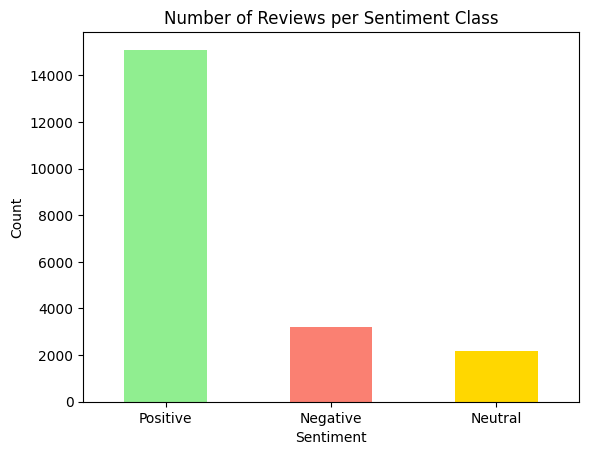

In [113]:
# Count classes
sentiment_counts = df['Sentiment'].value_counts()
print("Review count per sentiment:")
print(sentiment_counts)

sentiment_counts.plot(kind='bar', color=['lightgreen', 'salmon', 'gold'])
plt.title("Number of Reviews per Sentiment Class")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### TF-IDF Vectorization
- TF-IDF stands for Term Frequency-Inverse Document Frequency. It gives more weight to important words (that appear frequently in a document but rarely across all documents).
- `max_features=5000` limits the feature space to the top 5000 most important words. It helps reduce dimensionality and speed up training, avoid overfitting in smaller datasets and remove rarely used words that do not contribute much to sentiment classification
- `X_tfidf` is the input feature matrix, where each row represents a review, and each column a TF-IDF score for a word.
- `y` is the target labels (Negative, Neutral, or Positive), extracted from `df['Sentiment']`.

In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Cleaned_Review'])
y = df['Sentiment'].values

# Q3. Model Implementation for Text Classification
Three models were implemented to address the classification and sentiment analysis tasks:
- Logistic Regression (Machine Learning model)
- Convolutional Neural Network (CNN) (Deep Learning model)
- BERT (Transformer-based Deep Learning model)

This implementation directly fulfills Question 3, which requires the use of AI models for text classification. Specifically, the models were trained to classify reviews into three sentiment classes: Positive, Neutral, and Negative, making this a multiclass classification task.

In addition, this also satisfies the requirements of Question 5, which asks for the implementation of one machine learning model and one deep learning model for sentiment analysis, along with performance comparison.

Each model was applied to the same dataset, allowing a consistent evaluation of how traditional and modern NLP methods perform on multiclass sentiment prediction.

---
## 1. Logistic Regression
In this section, SMOTE (Synthetic Minority Over-sampling Technique) was applied to handle class imbalance before training the Logistic Regression model.
SMOTE works by generating synthetic samples for the minority classes (in this case, the Negative and Neutral sentiments), to balance the number of examples across all sentiment classes. This helps prevent the model from being biased toward the majority class (Positive).

After resampling, the dataset is split into training and testing sets.

Then, a Logistic Regression model is trained on the balanced data.

This setup helps ensure the classifier learns to predict all classes fairly, improving recall and F1-scores for the underrepresented classes.

In [10]:
# 1. SMOTE + Logistic Regression
smote = SMOTE(random_state=42)
X_tfidf_res, y_res = smote.fit_resample(X_tfidf, y)

# Train-Test Split for LR
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_tfidf_res, y_res, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

Logistic Regression Results:
               precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      2992
     Neutral       0.86      0.90      0.88      3001
    Positive       0.93      0.88      0.90      3063

    accuracy                           0.91      9056
   macro avg       0.91      0.91      0.91      9056
weighted avg       0.91      0.91      0.91      9056



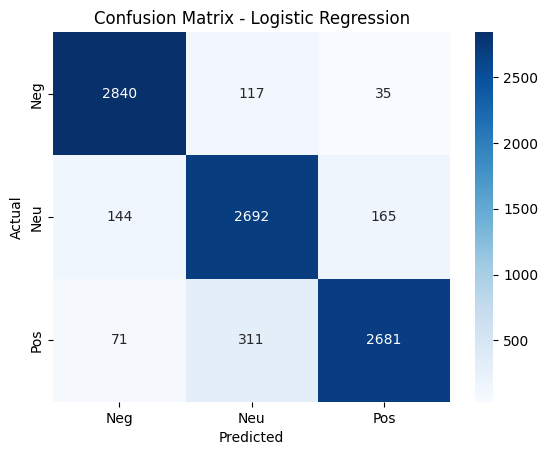

In [11]:
print("Logistic Regression Results:\n", classification_report(y_test_lr, y_pred_lr, target_names=['Negative', 'Neutral', 'Positive']))
sns.heatmap(confusion_matrix(y_test_lr, y_pred_lr), annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Macro F1-score of 0.91 shows consistent performance across all classes indicating that SMOTE effectively mitigated the original class imbalance.
- Most predictions are correctly classified.
- Confusion between `Positive` and `Neutral` is noticeable (311 misclassified as `Neutral`), which is common due to sentiment overlap in text.
- Very low misclassification for `Negative` reviews (only 152 misclassified).

---
## 2. Convoluted Neural Network (CNN)
Convolutional Neural Networks (CNNs) were implemented using PyTorch as the deep learning framework. CNNs are traditionally used in image processing, but they also work very well for text classification tasks. In text, CNNs capture local patterns (like key phrases or n-grams) that are strong indicators of sentiment. They're efficient and often perform better than simple RNNs for short text classification.

### Tokenization
The function tokenize(text) splits each review (which is already cleaned) into a list of words using Python’s built-in .split() method, converting raw text into tokens (individual words) that can be further processed and fed into the model.

In [13]:
# Tokenization
def tokenize(text):
    return text.split()

In [14]:
df['tokenized'] = df['Cleaned_Review'].apply(tokenize)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                      Cleaned_Review Sentiment  \
0  nice hotel expensive parking got good deal sta...  Positive   
1  ok nothing special charge diamond member hilto...  Negative   
2  nice room not experience hotel monaco seattle ...   Neutral   
3  unique great stay wonderful time hotel monaco ...  Positive   
4  great stay great stay went seahawk game awesom...  Positive   

                                           tokenized  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, room, not, experience, hotel, monaco, s...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

### Preparing a vocabulary to map each token
This section is preparing a vocabulary to map each word (token) in the dataset to a unique integer index, which is essential for feeding textual data into a neural network like CNN.

`counter = Counter(token for tokens in df['tokenized'] for token in tokens)`
- This uses Python’s collections.Counter to count the frequency of each word (token) in the entire dataset.
- It iterates through all tokenized reviews (df['tokenized']), flattening the list of tokens to count occurrences of each word.

`vocab = {word: i+2 for i, (word, _) in enumerate(counter.items())}`
- This line creates a dictionary called vocab, mapping each unique word to a unique integer index.
- It starts from index 2 because:
    - Index 0 is reserved for <pad> — used to pad shorter sequences.
    - Index 1 is reserved for <unk> — used for unknown or out-of-vocabulary words.

`vocab['<pad>'] = 0`
- Adds a special token <pad> with index 0, used to make all input sequences the same length.

`vocab['<unk>'] = 1`
- Adds a special token <unk> with index 1, used to represent words not found in the vocabulary (e.g., during inference on unseen data).

In [15]:
# Build vocab
counter = Counter(token for tokens in df['tokenized'] for token in tokens)
vocab = {word: i+2 for i, (word, _) in enumerate(counter.items())}  # reserve 0 for pad, 1 for unk
vocab['<pad>'] = 0
vocab['<unk>'] = 1

In [16]:
# Encode
def encode(tokens):
    return [vocab.get(token, 1) for token in tokens]
df['encoded'] = df['tokenized'].apply(encode)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                      Cleaned_Review Sentiment  \
0  nice hotel expensive parking got good deal sta...  Positive   
1  ok nothing special charge diamond member hilto...  Negative   
2  nice room not experience hotel monaco seattle ...   Neutral   
3  unique great stay wonderful time hotel monaco ...  Positive   
4  great stay great stay went seahawk game awesom...  Positive   

                                           tokenized  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, room, not, experience, hotel, monaco, s...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                             encoded  
0  [2, 3, 4, 5, 6, 7, 8, 9, 3, 10, 11, 12, 13, 14...  
1  [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 10, 8...  
2  [2, 25, 35, 69, 3, 213, 81, 7, 3, 214, 90, 215...  
3  [312, 64, 9, 313, 314, 3, 213, 63, 315, 196, 3...  
4  [64, 9, 64, 9, 358, 359, 360, 361, 362, 24, 18...

### Padding and Encoding
The code prepares the data for CNN model training by:
- Padding each tokenized review to a fixed length (`MAX_LEN = 180`) so all sequences are the same size.
- Encoding sentiment labels (`Negative`, `Neutral`, `Positive`) into numeric values (`0`, `1`, `2`) for classification.

In [17]:
# Padding
MAX_LEN = 180
X_seq = pad_sequence([torch.tensor(seq[:MAX_LEN] + [0]*(MAX_LEN-len(seq))) for seq in df['encoded']], batch_first=True)
y = df['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2}).values

### Random Oversampling
This code applies random oversampling using RandomOverSampler to balance the class distribution by duplicating samples from minority classes. It resamples the padded input sequences (`X_seq`) and their corresponding sentiment labels (`y`) to create a balanced training dataset (`X_res`, `y_res`).

In [18]:
# Oversample
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_seq.numpy(), y)

### Train/Test dataset split
This code splits the oversampled CNN dataset into training and testing sets, with 80% of the data used for training and 20% for testing. The split is made reproducible by setting `random_state=42`.

In [19]:
# Train/Test Split
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Model Overview
**The class CNNTextClassifier is a custom model that:**
- Takes tokenized and padded text input.
- Learns from embedded word representations.
- Applies convolutional layers with different kernel sizes (3, 4, 5) to extract local n-gram features.
- Uses ReLU activation and max pooling to reduce dimensionality and capture the most important features.
- Concatenates the outputs of all three convolutional layers.
- Applies a dropout layer for regularization.
- Uses a fully connected (linear) layer to output class scores (for multiclass classification: negative, neutral, positive).

**Key Components:**
- `nn.Embedding`: Maps word indices to dense vectors.
- `nn.Conv2d`: Applies convolution over embedded sequences.
- `F.relu`: Applies non-linear activation.
- `F.max_pool1d`: Extracts the most relevant features from the convolution outputs.
- `nn.Dropout`: Reduces overfitting.
- `nn.Linear`: Final layer to classify into sentiment classes.

In [20]:
# CNN Model
class CNNTextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.conv1 = nn.Conv2d(1, 100, (3, embed_dim))
        self.conv2 = nn.Conv2d(1, 100, (4, embed_dim))
        self.conv3 = nn.Conv2d(1, 100, (5, embed_dim))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(3 * 100, num_classes)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x1 = F.relu(self.conv1(x)).squeeze(3)
        x2 = F.relu(self.conv2(x)).squeeze(3)
        x3 = F.relu(self.conv3(x)).squeeze(3)
        x1 = F.max_pool1d(x1, x1.size(2)).squeeze(2)
        x2 = F.max_pool1d(x2, x2.size(2)).squeeze(2)
        x3 = F.max_pool1d(x3, x3.size(2)).squeeze(2)
        x = torch.cat((x1, x2, x3), 1)
        return self.fc(self.dropout(x))

Here's a brief explanation of the code:
- `cnn_model = CNNTextClassifier(...)`: Initializes the CNN model with embedding and convolution layers, and moves it to GPU (cuda) for faster training.
- `criterion = nn.CrossEntropyLoss()`: Defines the loss function suitable for multi-class classification.
- `optimizer = optim.Adam(...)`: Uses the Adam optimizer to update model weights efficiently.
- `train_loader and test_loader`: Create PyTorch data loaders to feed batches of training and testing data to the model during training and evaluation.

Together, this code sets up everything needed to train the CNN sentiment classifier.

In [21]:
cnn_model = CNNTextClassifier(vocab_size=len(vocab), embed_dim=100, num_classes=3).to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

train_loader = DataLoader(TensorDataset(torch.LongTensor(X_train_cnn), torch.LongTensor(y_train_cnn)), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(torch.LongTensor(X_test_cnn), torch.LongTensor(y_test_cnn)), batch_size=64)

In [22]:
cnn_model.train()

CNNTextClassifier(
  (embedding): Embedding(43309, 100, padding_idx=0)
  (conv1): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
  (conv2): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
  (conv3): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=300, out_features=3, bias=True)
)

### Training & Evaluation

**Training**:
The CNN model is trained for 5 epochs using mini-batches. Each batch is sent to the GPU (cuda) for faster computation. The model performs a forward pass, computes the loss, backpropagates, and updates weights.

**Evaluation**:
In evaluation mode, the model makes predictions on the test set without tracking gradients. True and predicted labels are collected for performance analysis.

In [23]:
for epoch in range(5):
    cnn_model.train()
    for xb, yb in train_loader:
        xb, yb = xb.to("cuda"), yb.to("cuda")
        optimizer.zero_grad()
        loss = criterion(cnn_model(xb), yb)
        loss.backward()
        optimizer.step()

cnn_model.eval()
y_true_cnn, y_pred_cnn = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        outputs = cnn_model(xb.to("cuda"))
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred_cnn.extend(preds)
        y_true_cnn.extend(yb.numpy())

CNN Model Results:
               precision    recall  f1-score   support

    Negative       0.97      0.99      0.98      2992
     Neutral       0.91      1.00      0.95      3001
    Positive       0.99      0.88      0.94      3063

    accuracy                           0.96      9056
   macro avg       0.96      0.96      0.96      9056
weighted avg       0.96      0.96      0.96      9056



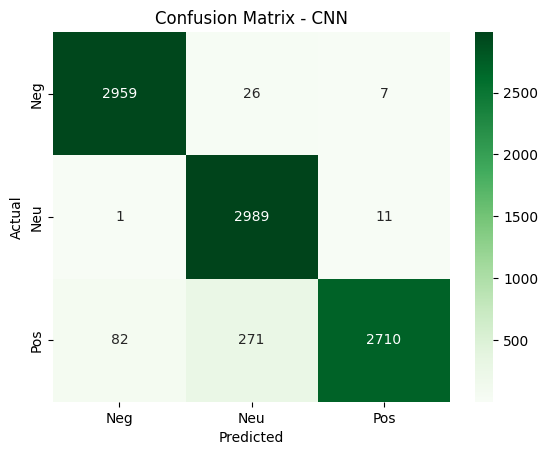

In [24]:
print("CNN Model Results:\n", classification_report(y_true_cnn, y_pred_cnn, target_names=['Negative', 'Neutral', 'Positive']))
sns.heatmap(confusion_matrix(y_true_cnn, y_pred_cnn), annot=True, fmt='d', cmap='Greens', xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The CNN model achieved outstanding performance for multiclass sentiment classification with an overall accuracy of 96%. It showed:
- High F1-scores across all classes: Negative (0.98), Neutral (0.95), Positive (0.94).
- Perfect recall (1.00) for Neutral class, meaning all neutral reviews were correctly identified.
- Minor misclassifications occurred mostly between Neutral and Positive classes.
- The model demonstrated strong generalization, making it highly effective for this NLP task.

---
## 3. BERT
BERT (Bidirectional Encoder Representations from Transformers) was used for the classification task to predict the sentiment of hotel reviews as Negative, Neutral, or Positive. As a transformer-based deep learning model, BERT is pre-trained on a vast amount of text data and fine-tuned on our specific dataset. Its bidirectional architecture allows it to understand the context of a word based on both its left and right surroundings, making it highly effective for sentiment classification in natural language.

### BERT Model Configuration

The following constants define the setup for fine-tuning the `bert-base-uncased` model on the sentiment classification task (Negative, Neutral, Positive):

- `MAX_LEN = 180`: Sets the maximum token length per review.
- `BATCH_SIZE = 16`: Defines the number of samples processed per batch.
- `NUM_EPOCHS = 4`: Sets how many times the model sees the training data.
- `LEARNING_RATE = 2e-5`: Optimizer learning rate, suitable for BERT fine-tuning.
- `NUM_CLASSES = 3`: Reflects the 3 sentiment classes.
- `PRETRAINED_MODEL_NAME = 'bert-base-uncased'`: Indicates the pre-trained transformer used.
- `DEVICE = torch.device("cuda")`: Enables GPU acceleration for faster training.

In [25]:
# BERT Classifier
# Constants
MAX_LEN = 180
BATCH_SIZE = 16
NUM_EPOCHS = 4
LEARNING_RATE = 2e-5
NUM_CLASSES = 3
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
DEVICE = torch.device("cuda")

### Neutral Data Augmentation using NLPaug

This section uses `nlpaug` to perform **contextual word-level augmentation** on neutral samples to address **class imbalance** in sentiment classification.

- **Label Encoding**:  
  Maps string sentiment labels (`Negative`, `Neutral`, `Positive`) to numeric labels (`0`, `1`, `2`) for model compatibility.
  
- **Subset Creation**:  
  Extracts all rows with **neutral sentiment** for targeted augmentation.

In [26]:
import nlpaug.augmenter.word as naw

In [123]:
# Encode Sentiment Labels
label_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_map)

- **Augmentation Setup**:  
  Initializes `ContextualWordEmbsAug` using a pre-trained BERT model (`bert-base-uncased`) to perform **context-aware word substitution**.
  - It substitutes words in a sentence with contextually relevant alternatives using BERT.
  - Runs on GPU (`device='cuda'`) for speed.

- **Apply Augmentation**:  
  Iterates through each neutral review and generates an augmented version. If augmentation fails, it keeps the original text.

- **Augmented DataFrame Creation**:  
  Builds a new DataFrame from the augmented neutral texts, retaining the sentiment label `1`.

This approach helps **enrich the neutral class** with more variation, potentially improving model generalization in imbalanced datasets.

In [28]:
# Augment Only Neutral Samples
neutral_df = df[df['Sentiment'] == 1].copy()
aug = naw.ContextualWordEmbsAug(model_path=PRETRAINED_MODEL_NAME, action="substitute", device='cuda')
augmented_texts = []

for text in neutral_df['Cleaned_Review']:
    try:
        augmented_texts.append(aug.augment(text)[0])  # Take only the first augmentation
    except:
        augmented_texts.append(text)

augmented_df = pd.DataFrame({
    'Cleaned_Review': augmented_texts,
    'Sentiment': [1] * len(augmented_texts)
})

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


- **Concatenate DataFrames**:  
  Combines the original dataset (`df`) and the newly augmented neutral samples (`augmented_df`) into a single DataFrame (`df_augmented`).

- **Drop Missing Values**:  
  Removes rows that have `NaN` in either the `Cleaned_Review` or `Sentiment` columns to ensure data integrity.

- **Ensure Integer Labels**:  
  Converts the `Sentiment` column to integer type, which is required for training machine learning models.

> This creates a balanced, clean dataset ready for model training.

In [29]:
# Combine and Clean Data
df_augmented = pd.concat([df[['Cleaned_Review', 'Sentiment']], augmented_df], ignore_index=True)
df_augmented = df_augmented.dropna(subset=['Cleaned_Review', 'Sentiment'])
df_augmented['Sentiment'] = df_augmented['Sentiment'].astype(int)

In [30]:
# Check class balance
print("Class distribution after augmentation:")
print(df_augmented['Sentiment'].value_counts())

Class distribution after augmentation:
Sentiment
2    15093
1     4368
0     3214
Name: count, dtype: int64


- `value_counts()` is used to print the number of samples per sentiment class.
- The sentiment labels represent:
  - `0`: Negative
  - `1`: Neutral
  - `2`: Positive
> The **Neutral** class is now better represented, reducing the class imbalance and improving model fairness during training.

### Prepare Input and Labels for Modeling
- `X`: Extracts the **Cleaned_Review** text as input features and ensures all entries are strings.
- `y`: Extracts the corresponding **Sentiment** labels as target variables for training the model.

These variables (`X`, `y`) will be used to tokenize the input text and feed into the BERT model for training and evaluation.

In [31]:
# Prepare Input and Labels
X = df_augmented['Cleaned_Review'].astype(str).values
y = df_augmented['Sentiment'].values

### Compute Class Weights
- `compute_class_weight(...)`: Calculates class weights inversely proportional to class frequencies to handle **class imbalance**.
- `torch.tensor(...).to(DEVICE)`: Converts the weights into a PyTorch tensor and moves them to GPU (`DEVICE`) for model training.

These weights will be used during model training (in `CrossEntropyLoss`) to give more importance to underrepresented classes.

In [34]:
# Compute Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(DEVICE)

### BERT Tokenizer Initialization
- `BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)` loads the **pretrained BERT tokenizer** (`bert-base-uncased` in this case).
- This tokenizer is used to convert raw text into token IDs compatible with the BERT model input format.

It ensures consistency with the BERT model’s vocabulary and subword tokenization rules.

In [35]:
# Tokenizer 
tokenizer_bert = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### Custom Dataset for BERT
The `SentimentDataset` class is a PyTorch `Dataset` designed to work with BERT for sentiment classification.

- **`__init__`**: 
  - Tokenizes all input texts using the specified BERT tokenizer.
  - Applies padding and truncation to a uniform `max_len`.
  - Converts the tokenized inputs into PyTorch tensors.
  - Stores the corresponding sentiment labels as tensors.
- **`__len__`**: 
  - Returns the number of samples in the dataset.
- **`__getitem__`**: 
  - Returns the tokenized input and its label for a given index.

This dataset structure is compatible with PyTorch `DataLoader` for efficient batching and training.

In [36]:
#  Custom Dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.encodings = tokenizer(list(texts), padding='max_length', truncation=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

#### Data Preparation
- **Train-Test Split**: 
  - The dataset is split into 80% training and 20% testing using `stratify=y` to preserve class distribution.
- **Tokenization**: 
  - The `SentimentDataset` class is used to tokenize and encode the text using BERT’s tokenizer.
- **DataLoaders**: 
  - `train_loader` and `test_loader` are created for batching input during training and evaluation.

#### BERT Model
- **Model Loaded**: `BertForSequenceClassification` with 3 output classes (Negative, Neutral, Positive).
- **Architecture**: 
  - BERT base with 12 transformer layers, 768 hidden size, and a classification head on top.

#### Optimization Setup
- **Optimizer**: AdamW (recommended for transformer models).
- **Learning Rate Scheduler**: Linear scheduler with warmup steps set to 0.
- **Training Mode**: The model is set to `.train()` mode to enable dropout and gradient updates.

This sets up the full pipeline for fine-tuning BERT on a multiclass sentiment classification task using GPU acceleration.

In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_dataset = SentimentDataset(X_train, y_train, tokenizer_bert, MAX_LEN)
test_dataset = SentimentDataset(X_test, y_test, tokenizer_bert, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [38]:
# Load BERT Model
model_bert = BertForSequenceClassification.from_pretrained(PRETRAINED_MODEL_NAME, num_labels=NUM_CLASSES)
model_bert.to(DEVICE)

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [39]:
# Optimizer & Scheduler
optimizer = AdamW(model_bert.parameters(), lr=LEARNING_RATE)
total_steps = NUM_EPOCHS * len(train_loader)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:
# Training
model_bert.train()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

### Training and Evaluation

**Training Loop**
- The BERT model is fine-tuned over multiple epochs using the training data.
- For each batch:
  - Inputs and labels are moved to the GPU.
  - Predictions (`logits`) are generated by passing inputs through the model.
  - Cross-entropy loss is calculated using class weights to handle imbalance.
  - Backpropagation is performed and model parameters are updated.
  - The learning rate is adjusted using a linear scheduler.

**Evaluation**
- After training, the model is switched to evaluation mode (`model.eval()`).
- Predictions are made on the test set without gradient calculation.
- Predicted labels (`y_pred_bert`) and true labels (`y_true_bert`) are collected for performance evaluation.

This completes the fine-tuning of the BERT model for sentiment classification on the augmented hotel reviews dataset.


In [42]:
for epoch in range(NUM_EPOCHS):
    total_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}"):
        inputs, labels = batch
        inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
        labels = labels.to(DEVICE).long()
        
        outputs = model_bert(**inputs)
        logits = outputs.logits
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fn(logits, labels)

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        total_loss += loss.item()
 

Epoch 4/4: 100%|██████████| 1134/1134 [1:06:26<00:00,  3.51s/it]


In [43]:
print(f"Epoch {epoch+1} | Loss: {total_loss:.4f}")

Epoch 4 | Loss: 137.5651


In [44]:
# Evaluation 
model_bert.eval()
y_true_bert, y_pred_bert = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(DEVICE) for k, v in inputs.items()}
        outputs = model_bert(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        y_pred_bert.extend(predictions)
        y_true_bert.extend(labels.numpy())

BERT Model Results:
               precision    recall  f1-score   support

    Negative       0.84      0.80      0.82       643
     Neutral       0.68      0.81      0.74       874
    Positive       0.96      0.92      0.94      3018

    accuracy                           0.88      4535
   macro avg       0.83      0.84      0.83      4535
weighted avg       0.89      0.88      0.88      4535



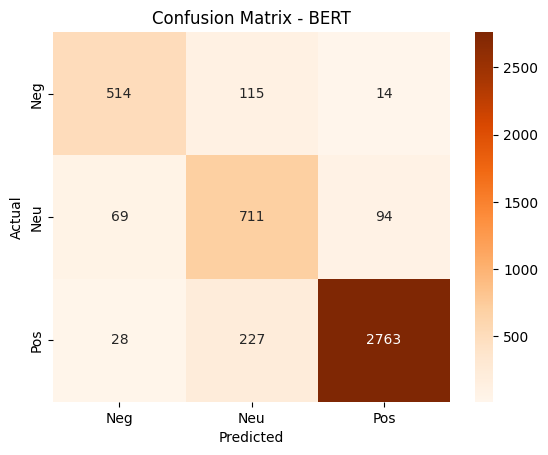

In [45]:
# Metrics and Confusion Matrix
print("BERT Model Results:\n", classification_report(y_true_bert, y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))
sns.heatmap(confusion_matrix(y_true_bert, y_pred_bert), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title("Confusion Matrix - BERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The BERT model was evaluated on a multiclass sentiment classification task with three classes: **Negative**, **Neutral**, and **Positive**. Below is a summary of its performance:

- The **Positive** class achieved the highest performance across all metrics, indicating BERT is highly effective in identifying positive sentiment.
- The **Neutral** class was the most challenging, with the lowest F1-score (0.74), mainly due to overlapping features with both negative and positive classes.
- The **Negative** class had moderate performance, with some misclassifications into the Neutral category.

BERT showed strong overall performance, especially in distinguishing **Positive** sentiment. However, it struggled slightly with **Neutral** reviews, which are often less distinct and context-dependent. This outcome is consistent with expectations in real-world sentiment analysis where Neutral sentiments are more ambiguous. Despite this, the model demonstrates robustness and reliability for multiclass sentiment classification tasks.

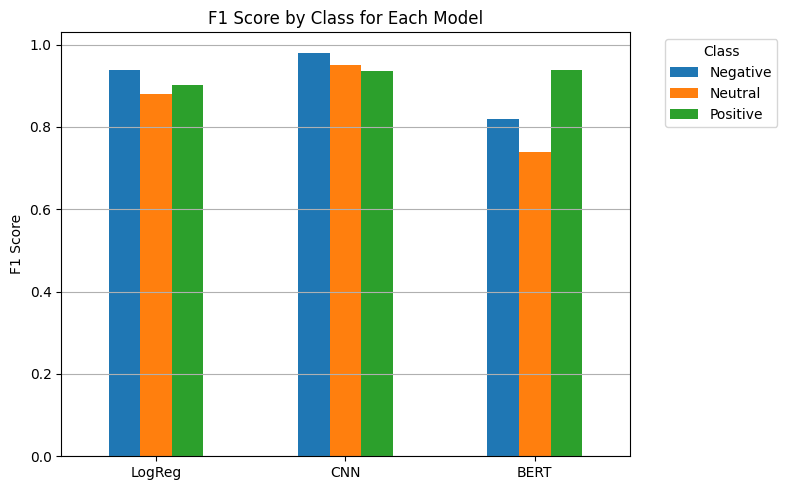

In [50]:
# F1 Score Comparison
model_names = ['LogReg', 'CNN', 'BERT']
f1_scores = [
    f1_score(y_test_lr, y_pred_lr, average=None),
    f1_score(y_test_cnn, y_pred_cnn, average=None),
    f1_score(y_true_bert, y_pred_bert, average=None)
]

f1_df = pd.DataFrame(f1_scores, columns=['Negative', 'Neutral', 'Positive'], index=model_names)

ax = f1_df.plot(kind='bar', figsize=(8, 5))
plt.title("F1 Score by Class for Each Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=0)

# Move legend outside the plot
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to fit legend
plt.show()

The bar chart compares the **F1-scores** of three different models; **Logistic Regression (LogReg)**, **Convolutional Neural Network (CNN)**, and **BERT** across each sentiment class: **Negative**, **Neutral**, and **Positive**.

- **CNN** outperformed all models across all sentiment classes, especially on the **Neutral** class with an F1-score close to **0.95**, indicating strong generalization and learning capability.
- **Logistic Regression** showed solid performance with balanced F1-scores across all classes, performing slightly better on **Negative** reviews.
- **BERT** achieved the **a high F1-score for the Positive class** but underperformed on **Neutral** and **Negative** classes compared to the other models, likely due to challenges in distinguishing subtle sentiment differences.
---
- **CNN** is the best overall performer with consistently high F1-scores across all sentiment categories.
- **LogReg** is a strong baseline model with good balance.
- **BERT**, despite being a powerful transformer-based model, shows room for improvement in handling **Neutral** and **Negative** sentiments, possibly due to class overlap and data complexity.

This comparison reinforces the need to consider both model complexity and class-specific behavior when selecting a model for sentiment classification.

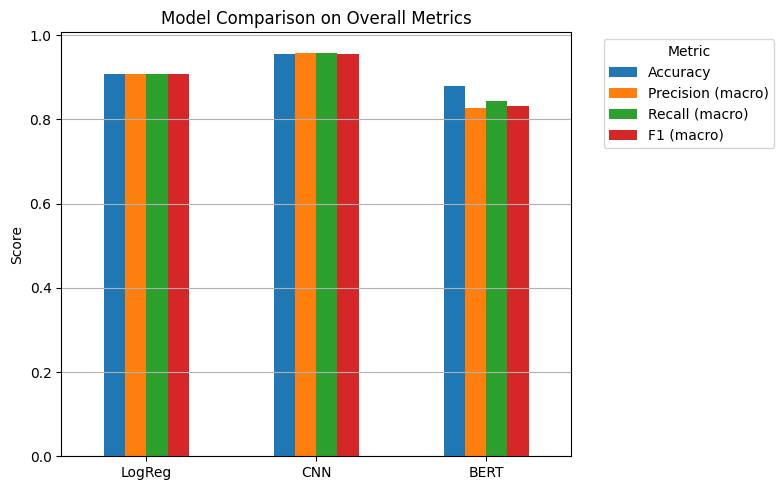

In [51]:
# Additional Comparison of Accuracy, Precision, Recall
metrics_df = pd.DataFrame({
    'Accuracy': [
        accuracy_score(y_test_lr, y_pred_lr),
        accuracy_score(y_true_cnn, y_pred_cnn),
        accuracy_score(y_true_bert, y_pred_bert)
    ],
    'Precision (macro)': [
        precision_score(y_test_lr, y_pred_lr, average='macro'),
        precision_score(y_true_cnn, y_pred_cnn, average='macro'),
        precision_score(y_true_bert, y_pred_bert, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test_lr, y_pred_lr, average='macro'),
        recall_score(y_true_cnn, y_pred_cnn, average='macro'),
        recall_score(y_true_bert, y_pred_bert, average='macro')
    ],
    'F1 (macro)': [
        f1_score(y_test_lr, y_pred_lr, average='macro'),
        f1_score(y_true_cnn, y_pred_cnn, average='macro'),
        f1_score(y_true_bert, y_pred_bert, average='macro')
    ]
}, index=model_names)

# Plot with legend outside
ax = metrics_df.plot(kind='bar', figsize=(8, 5))
plt.title("Model Comparison on Overall Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)

# Move legend to the right of the chart
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The chart provides a comparative analysis of three models; **Logistic Regression (LogReg)**, **CNN**, and **BERT** using the following overall metrics: **Accuracy**, **Precision (macro)**, **Recall (macro)**, and **F1-score (macro)**.

- **CNN** achieves the **highest performance** across all metrics, showcasing strong generalization and robust learning of sentiment patterns.
- **Logistic Regression** also performs consistently well across metrics, making it a reliable baseline classifier.
- **BERT**, while powerful, records slightly lower scores across the board, especially in macro precision and F1-score. This could be due to data complexity or challenges in fine-tuning on imbalanced or noisy text.

<hr>

- **CNN is the top-performing model** in terms of overall accuracy and balance across all evaluation metrics.
- **LogReg** remains competitive and stable.
- **BERT**, despite being a transformer-based model, underperformed relative to expectations, indicating that more fine-tuning or domain adaptation might be necessary.

This overall evaluation helps justify model selection decisions based on task requirements and resource availability.

# Q4. Model Implementation for Clustering 
For the **text clustering task**, topic modeling was first performed using **Latent Dirichlet Allocation (LDA)** and **Non-negative Matrix Factorization (NMF)** to uncover underlying themes in the hotel reviews.

Next, two clustering algorithms were implemented to group the reviews:
- **KMeans Clustering**
- **Agglomerative Clustering**

To determine the optimal number of clusters, two key techniques were applied:
- **Elbow Method** (for KMeans)
- **Dendrogram** (for Agglomerative Clustering)

These methods helped visualize within-cluster variance and hierarchical distances, guiding the selection of a suitable number of clusters for meaningful segmentation.

## Text Cleaning: Stopword Removal and Lemmatization

In this step, we enhance text preprocessing by customizing stop word removal and applying lemmatization to the hotel reviews. 

- **Custom Stop Words**: In addition to standard English stop words, we define a set of domain-specific words (`'hotel', 'stay', 'stayed', 'good', 'great', 'nice', 'staff', 'day', 'time', 'night'`) that are common in hotel reviews but do not add meaningful differentiation for sentiment or topic analysis. These are added to the stop words list to be removed during preprocessing.

- **Lemmatizer**: The `WordNetLemmatizer` is initialized to reduce each word to its base or dictionary form (e.g., "staying" - "stay", "better" - "good"), which helps unify similar words and improves feature consistency in downstream NLP tasks.

- **Cleaning Execution**: The preprocessing is applied to each review in the dataset (`df['Review']`) via a `preprocess_text` function. The cleaned output is stored in a new column, `Cleaned_Review`.

This cleaned text is crucial for improving the quality and performance of subsequent models such as text classification and clustering.


In [119]:
# Redefine custom stop words
domain_specific = {'hotel', 'stay', 'stayed', 'good', 'great', 'nice', 'staff', 'day', 'time', 'night'}
stop_words = set(stopwords.words('english')).union(domain_specific)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

In [122]:
df = df.drop('Cluster_LDA_Agg', axis=1)

In [124]:
df['Cleaned_Review'] = df['Review'].astype(str).apply(preprocess_text)
df.head()

Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                      Cleaned_Review  Sentiment  
0  expensive parking got deal anniversary arrived...          2  
1  ok nothing special charge diamond member hilto...          0  
2  room experience monaco seattle large bathroom ...          1  
3  unique wonderful monaco location excellent sho...          2  
4  went seahawk game awesome downfall view buildi...          2

## Vectorization: Document-Term Matrix Construction

To prepare the cleaned text data for topic modeling and clustering, the data was converted into numerical representations using two common vectorization techniques:

- **CountVectorizer (`X_count`)**: Transforms text into a sparse matrix based on term frequency (i.e., how often a word appears in a document). Words that appear in more than 95% or fewer than 2 documents are excluded using `max_df=0.95` and `min_df=2`, reducing noise and extremely rare terms. English stop words are also removed.

- **TfidfVectorizer (`X_tfidf`)**: Similar to CountVectorizer but scales the term frequency by inverse document frequency (TF-IDF), giving less weight to commonly occurring terms and more to distinctive ones. This is often more effective for clustering and topic modeling as it highlights important words in each document.

These vectorized representations serve as inputs for later models like LDA, NMF, and clustering algorithms (e.g., KMeans, Agglomerative, GMM).

In [63]:
# Convert text to document-term matrix
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_count = count_vectorizer.fit_transform(df['Cleaned_Review'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Cleaned_Review'])

## Topic Modeling with LDA and NMF

To uncover hidden themes in the hotel reviews, two topic modeling algorithms were applied:

- **Latent Dirichlet Allocation (LDA)**:  
  LDA is a probabilistic model that assumes each document is a mixture of topics and each topic is a mixture of words.  
  - The model was trained on the **CountVectorizer** matrix (`X_count`).
  - The number of topics (`n_components`) was set to **5**, meaning it attempts to uncover 5 underlying themes in the corpus.
  - The output (`lda_topics`) is a matrix showing each document's probability distribution across the 5 topics.

- **Non-negative Matrix Factorization (NMF)**:  
  NMF is a matrix decomposition technique that factorizes the document-term matrix into two non-negative matrices representing documents and topics.  
  - It was applied on the **TF-IDF matrix** (`X_tfidf`) for better performance on sparse data.
  - Like LDA, it was configured to extract **5 topics**.
  - The result (`nmf_topics`) indicates the strength of each topic in each document.

Both models help identify the most prominent topics discussed in the hotel reviews, supporting exploratory data analysis and clustering.

In [64]:
# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(X_count)

In [65]:
# Fit NMF model
nmf = NMF(n_components=5, random_state=42)
nmf_topics = nmf.fit_transform(X_tfidf)

## 1. KMeans Clustering on LDA and NMF Topics with Elbow Method

To uncover patterns in the reviews, **topic modeling** was performed using both **LDA (Latent Dirichlet Allocation)** and **NMF (Non-negative Matrix Factorization)**. Each of these methods generated a topic matrix representing document-topic distributions.

To cluster these topic vectors meaningfully, the **KMeans clustering algorithm** was applied to both LDA and NMF outputs. The process involved the following key steps:

#### Elbow Method for Optimal Cluster Selection
- The **Elbow Method** was used to determine the optimal number of clusters `k` for both LDA and NMF topic matrices.
- **Inertia (Within-Cluster Sum of Squares)** was computed for values of `k` ranging from 2 to 10.
- The elbow plots for both LDA and NMF showed a clear inflection at **k = 5**, indicating this as the most suitable number of clusters.
- This choice helps prevent **underfitting** (too few clusters) and **overfitting** (too many clusters).

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

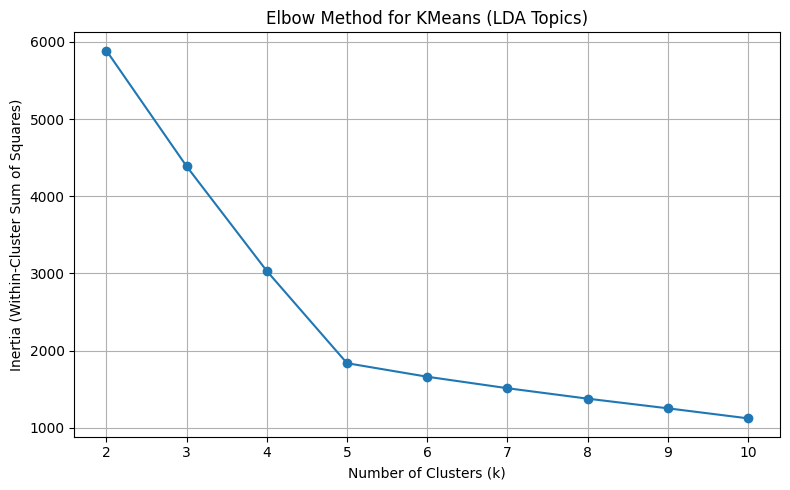

In [66]:
# 1. KMeans
# elbow plot for KMeans (LDA)
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lda_topics)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for KMeans (LDA Topics)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

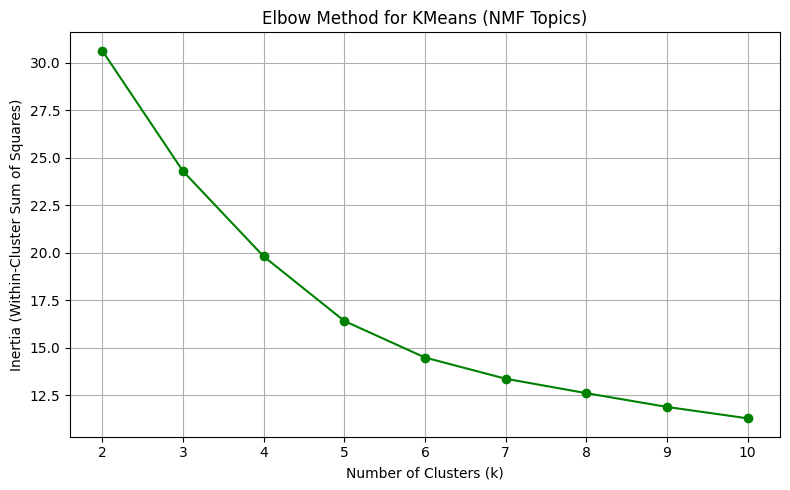

In [72]:
# elbow plot for KMeans (NMF)
inertias_nmf = []
k_range = range(2, 11)

for k in k_range:
    kmeans_nmf = KMeans(n_clusters=k, random_state=42)
    kmeans_nmf.fit(nmf_topics)  # Use NMF topic matrix
    inertias_nmf.append(kmeans_nmf.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias_nmf, marker='o', color='green')
plt.title('Elbow Method for KMeans (NMF Topics)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

#### KMeans Clustering and Evaluation
- **KMeans(n_clusters=5)** was applied to both **LDA** and **NMF** topic matrices.
- Cluster labels were assigned using `.fit_predict()`.
- The **Silhouette Score** was computed for both models to assess cluster quality:
  - A higher score (closer to 1) indicates well-separated and cohesive clusters.
  - This provides an objective metric to compare the performance of clustering on both topic representations.

In summary, clustering was successfully applied to both LDA and NMF topics, with **5 clusters** selected as optimal using the Elbow Method, and cluster quality evaluated via the Silhouette Score.

In [71]:
kmeans_lda = KMeans(n_clusters=5, random_state=42)
labels_kmeans_lda = kmeans_lda.fit_predict(lda_topics)
sil_kmeans_lda = silhouette_score(lda_topics, labels_kmeans_lda)

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
kmeans_nmf = KMeans(n_clusters=5, random_state=42)
labels_kmeans_nmf = kmeans_nmf.fit_predict(nmf_topics)
sil_kmeans_nmf = silhouette_score(nmf_topics, labels_kmeans_nmf)

C:\Users\user\anaconda3\envs\rl-assignment\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 2. Agglomerative Clustering on LDA and NMF Topics

To further explore the underlying patterns in the reviews, **Agglomerative Clustering**—a type of hierarchical clustering—was applied to both **LDA** and **NMF** topic representations.

#### Dendrogram Analysis
- A **dendrogram** was generated using the **Ward linkage method** to visualize the hierarchical structure of clusters.
- This plot helps to determine the optimal number of clusters by observing where large vertical jumps (or cuts) occur.
- Based on the dendrograms:
  - **5 clusters** were chosen for LDA topics.
  - **3 clusters** were selected for NMF topics.

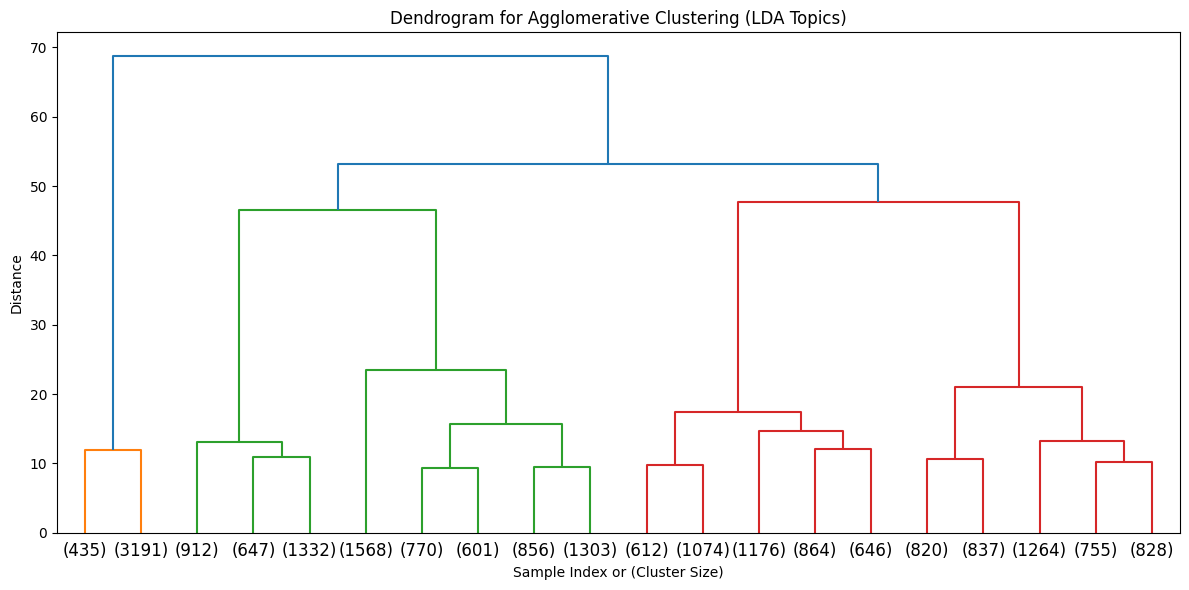

In [74]:
# 2. Agglomerative Clustering

# Agglomerative Clustering (LDA Topics)
linked = linkage(lda_topics, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Dendrogram for Agglomerative Clustering (LDA Topics)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

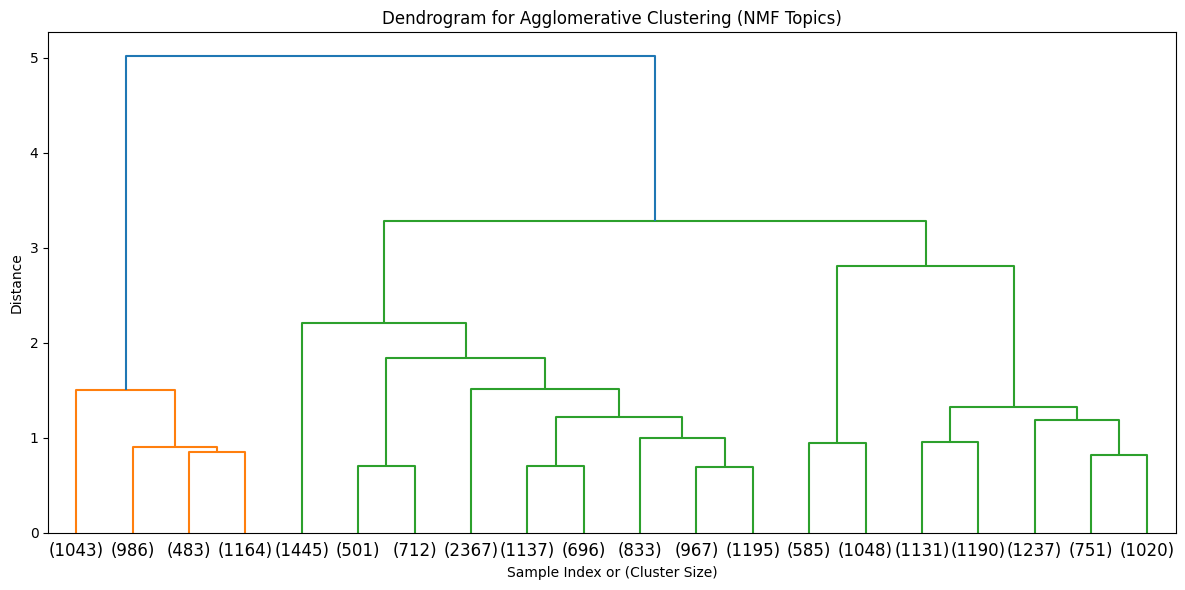

In [76]:
# Agglomerative Clustering (NMF Topics)
linked_nmf = linkage(nmf_topics, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked_nmf, truncate_mode='lastp', p=20)
plt.title('Dendrogram for Agglomerative Clustering (NMF Topics)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

#### Clustering and Evaluation
- **AgglomerativeClustering** was performed using the `fit_predict()` method to assign cluster labels to each review.
- The quality of clustering was measured using the **Silhouette Score**, which reflects how well each review fits within its cluster compared to other clusters.
  - Higher silhouette scores indicate better-defined clusters.

This hierarchical approach provided an alternative clustering structure to KMeans, helping reveal deeper relationships between topics and document groups.

In [84]:
agg_lda = AgglomerativeClustering(n_clusters=5)
labels_agg_lda = agg_lda.fit_predict(lda_topics)
sil_agg_lda = silhouette_score(lda_topics, labels_agg_lda)

In [77]:
agg_nmf = AgglomerativeClustering(n_clusters=3)
labels_agg_nmf = agg_nmf.fit_predict(nmf_topics)
sil_agg_nmf = silhouette_score(nmf_topics, labels_agg_nmf)

## Cluster Quality Comparison of Clustering Models

To assess the quality of clusters formed using different topic modeling and clustering approaches, **Silhouette Scores**, **Calinski-Harabasz Index** and **Davies-Bouldin Index** were calculated. Each metric serves a purpose in evaluting cluster quality:
- Silhouette Score: Measures how well each point lies within its cluster. -1 (bad) to +1 (good).
- Calinski-Harabasz Index: Measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher is better (indicates dense and well-separated clusters).
- Davies-Bouldin Index: Measures the average similarity between each cluster and its most similar one (based on intra-cluster distances). Lower is better.

In [125]:
# Silhouette Scores

# KMeans
print(f"NMF KMeans Silhouette Score:         {sil_kmeans_nmf:.4f}")
print(f"LDA KMeans Silhouette Score:         {sil_kmeans_lda:.4f}")

# Agglomerative
print(f"NMF Agglomerative Silhouette Score:  {sil_agg_nmf:.4f}")
print(f"LDA Agglomerative Silhouette Score:  {sil_agg_lda:.4f}")

NMF KMeans Silhouette Score:         0.3007
LDA KMeans Silhouette Score:         0.4801
NMF Agglomerative Silhouette Score:  0.2364
LDA Agglomerative Silhouette Score:  0.4091


In [126]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# KMeans
ch_kmeans_lda = calinski_harabasz_score(lda_topics, labels_kmeans_lda)
db_kmeans_lda = davies_bouldin_score(lda_topics, labels_kmeans_lda)
ch_kmeans_nmf = calinski_harabasz_score(nmf_topics, labels_kmeans_nmf)
db_kmeans_nmf = davies_bouldin_score(nmf_topics, labels_kmeans_nmf)

# Agglomerative
ch_agg_lda = calinski_harabasz_score(lda_topics, labels_agg_lda)
db_agg_lda = davies_bouldin_score(lda_topics, labels_agg_lda)
ch_agg_nmf = calinski_harabasz_score(nmf_topics, labels_agg_nmf)
db_agg_nmf = davies_bouldin_score(nmf_topics, labels_agg_nmf)

# Print results
print(f"LDA KMeans Calinski-Harabasz Index:       {ch_kmeans_lda:.4f}")
print(f"LDA KMeans Davies-Bouldin Index:          {db_kmeans_lda:.4f}")
print(f"NMF KMeans Calinski-Harabasz Index:       {ch_kmeans_nmf:.4f}")
print(f"NMF KMeans Davies-Bouldin Index:          {db_kmeans_nmf:.4f}")

print(f"LDA Agglomerative Calinski-Harabasz Index: {ch_agg_lda:.4f}")
print(f"LDA Agglomerative Davies-Bouldin Index:    {db_agg_lda:.4f}")
print(f"NMF Agglomerative Calinski-Harabasz Index: {ch_agg_nmf:.4f}")
print(f"NMF Agglomerative Davies-Bouldin Index:    {db_agg_nmf:.4f}")

LDA KMeans Calinski-Harabasz Index:       18007.6279
LDA KMeans Davies-Bouldin Index:          0.7151
NMF KMeans Calinski-Harabasz Index:       8470.7654
NMF KMeans Davies-Bouldin Index:          1.0749
LDA Agglomerative Calinski-Harabasz Index: 13352.2827
LDA Agglomerative Davies-Bouldin Index:    0.8528
NMF Agglomerative Calinski-Harabasz Index: 7186.5672
NMF Agglomerative Davies-Bouldin Index:    1.5570


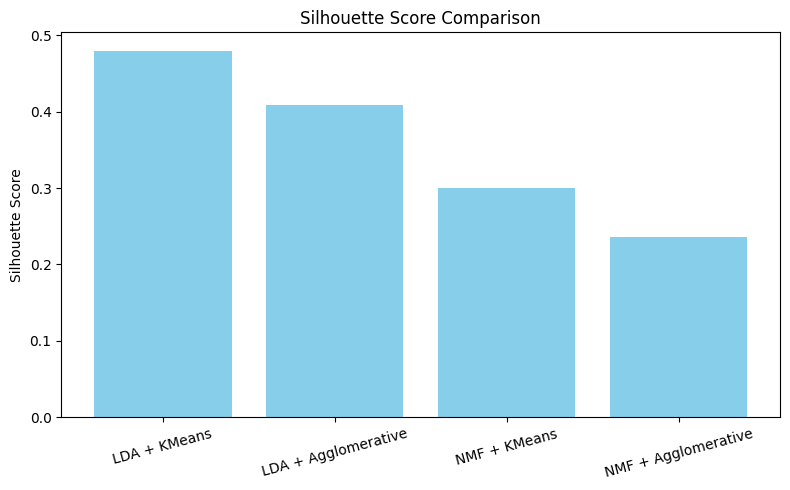

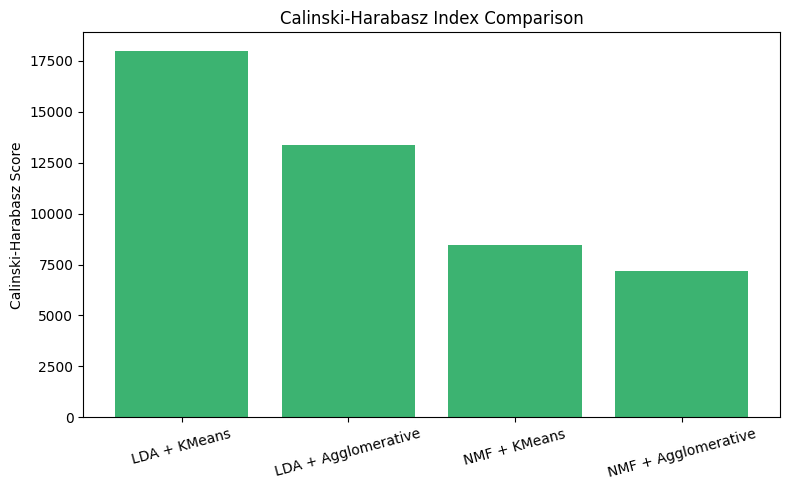

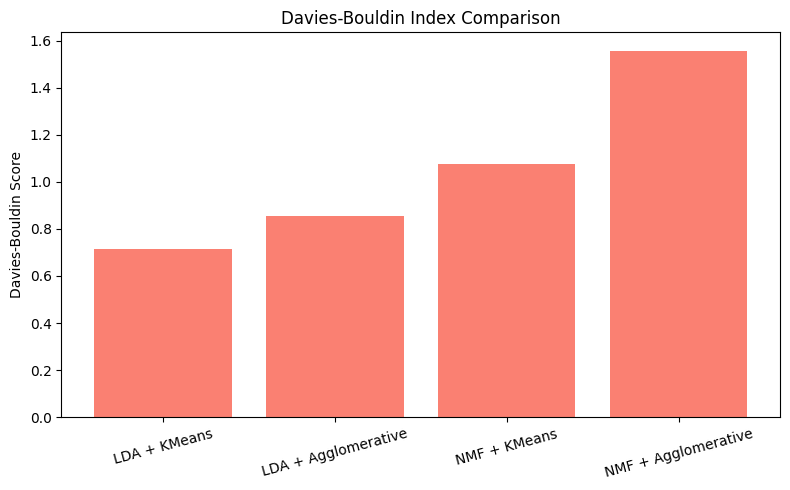

In [127]:
# Cluster models
models = ['LDA + KMeans', 'LDA + Agglomerative', 'NMF + KMeans', 'NMF + Agglomerative']

# Scores
silhouette_scores = [0.4801, 0.4091, 0.3007, 0.2364]
calinski_scores = [18007.6279, 13352.2827, 8470.7654, 7186.5672]
davies_scores = [0.7151, 0.8528, 1.0749, 1.5570]

# Plot 1: Silhouette Score
plt.figure(figsize=(8, 5))
plt.bar(models, silhouette_scores, color='skyblue')
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Calinski-Harabasz Index
plt.figure(figsize=(8, 5))
plt.bar(models, calinski_scores, color='mediumseagreen')
plt.title('Calinski-Harabasz Index Comparison')
plt.ylabel('Calinski-Harabasz Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 3: Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.bar(models, davies_scores, color='salmon')
plt.title('Davies-Bouldin Index Comparison')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

#### 1. Silhouette Score Comparison

- **LDA + KMeans** achieved the highest score (**0.48**), indicating strong intra-cluster similarity and clear cluster boundaries.
- **NMF + Agglomerative** had the lowest score (**0.24**), suggesting weaker clustering performance and less well-defined groupings.
> LDA-based models consistently outperform NMF-based ones.
> KMeans generally performs better than Agglomerative clustering across both topic models.

<hr>


#### 2. Calinski-Harabasz Index Comparison

- **LDA + KMeans** again leads with a score of **18007**, showing high between-cluster dispersion relative to within-cluster dispersion.
- **NMF + Agglomerative** scored lowest (**7186**), further confirming weaker clustering quality.
> Topic vectors generated from LDA offer clearer cluster structures.
> KMeans provides more distinct clusters compared to Agglomerative clustering.

<hr>


#### 3. Davies-Bouldin Index Comparison

- **LDA + KMeans** has the lowest score (**0.71**), signifying the best separation and cohesion.
- **NMF + Agglomerative** performs worst with a score of **1.56**.
> A lower DBI supports that LDA + KMeans yields more compact and well-separated clusters.
? The results are consistent with the other two metrics.

<hr>


| Method                | Silhouette ↑ | Calinski-Harabasz ↑ | Davies-Bouldin ↓ |
|----------------------|--------------|----------------------|------------------|
| **LDA + KMeans**      | 0.4801       | 18007.6279           | 0.7151           |
| **LDA + Agglomerative** | 0.4091       | 13352.2827           | 0.8528           |
| **NMF + KMeans**      | 0.3007       | 8470.7654            | 1.0749           |
| **NMF + Agglomerative**| 0.2364       | 7186.5672            | 1.5570           |

From all three evaluation metrics, **LDA + KMeans** stands out as the best clustering method for this task. It produces more meaningful, distinct, and compact clusters compared to other combinations.

## PCA Visualization of LDA-Based Clustering Models

To visualize the effectiveness of clustering on LDA topic representations, Principal Component Analysis (PCA) was applied to reduce the dimensionality of the topic vectors to two components. This enables visual inspection of cluster separation and density.

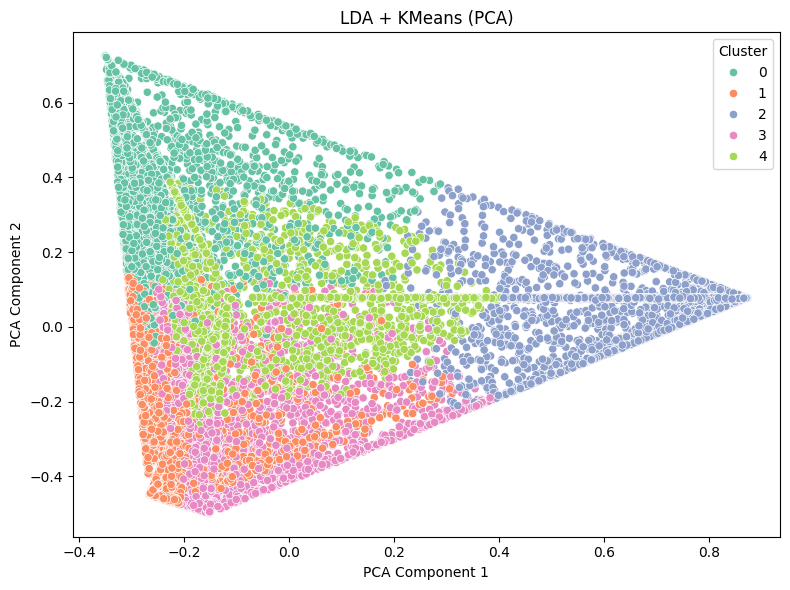

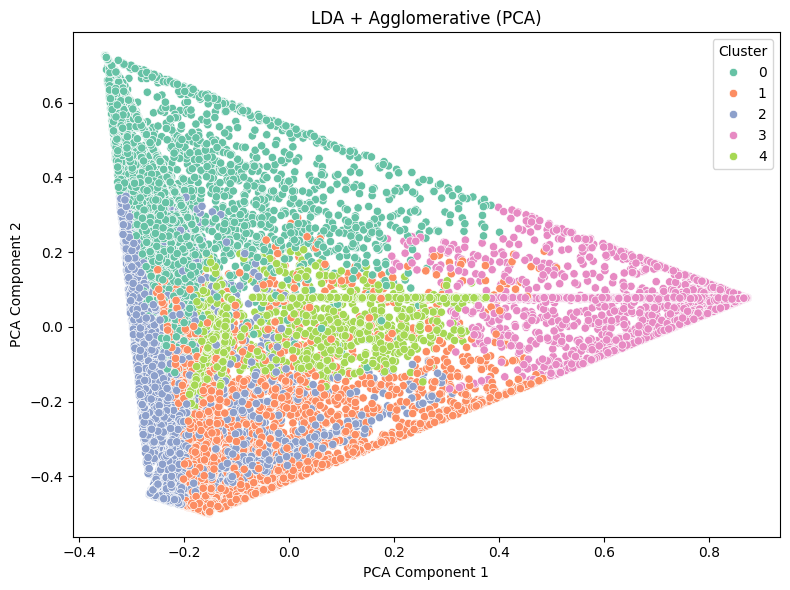

In [117]:
# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
lda_2d_pca = pca.fit_transform(lda_topics)

# Plotting helper (same as before)
def plot_clusters(data_2d, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='Set2', legend='full')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title='Cluster', loc='best')
    plt.tight_layout()
    plt.show()

# Visualize clusters
plot_clusters(lda_2d_pca, labels_kmeans_lda, "LDA + KMeans (PCA)")
plot_clusters(lda_2d_pca, labels_agg_lda, "LDA + Agglomerative (PCA)")

- The **first plot** shows the result of **KMeans clustering** applied to LDA topic vectors.
  - The clusters are well-separated and compact, suggesting strong cohesion within clusters and a high silhouette score (0.4801).
  - This visual outcome aligns with the earlier quantitative metrics, confirming the model's clustering quality.

- The **second plot** visualizes the **Agglomerative Clustering** on the same LDA topic data.
  - While there is still visible clustering, the separation between groups is slightly less distinct compared to KMeans.
  - This corresponds with the slightly lower silhouette score of 0.4091 for Agglomerative clustering.

In both visualizations, cluster labels are color-coded, and the triangular structure reflects the LDA topic distribution constraints. These PCA plots support the conclusion that **KMeans performed better than Agglomerative Clustering** on LDA topic features.

## Cluster Analysis Based on LDA Topic Distributions (KMeans vs Agglomerative)

Each cluster was analyzed by visualizing with WordClouds and using Top Keywords to gain semantic insights into the themes present in hotel reviews.

In [118]:
# Assign Cluster Labels
df['Cluster_LDA_KMeans'] = labels_kmeans_lda
df['Cluster_LDA_Agg'] = labels_agg_lda    

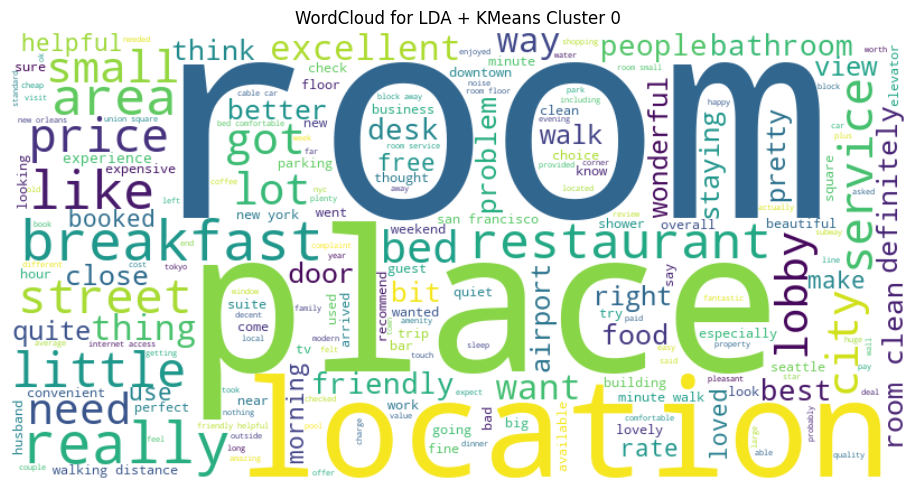

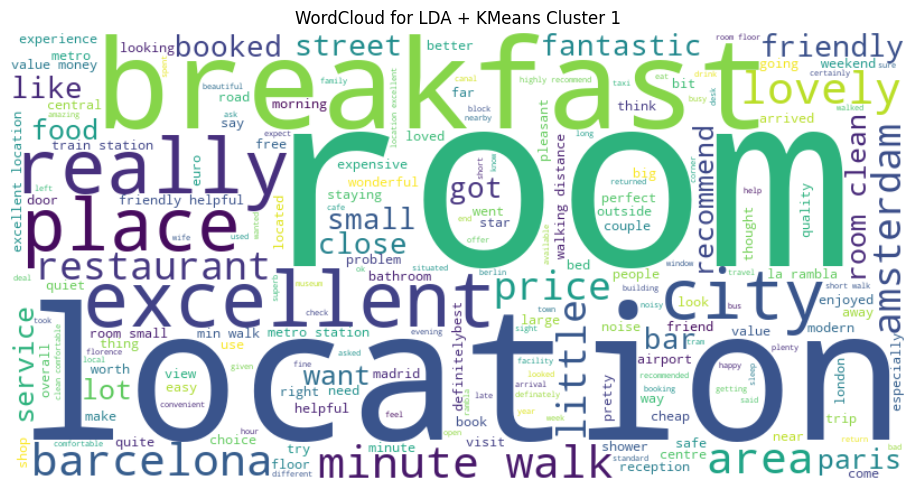

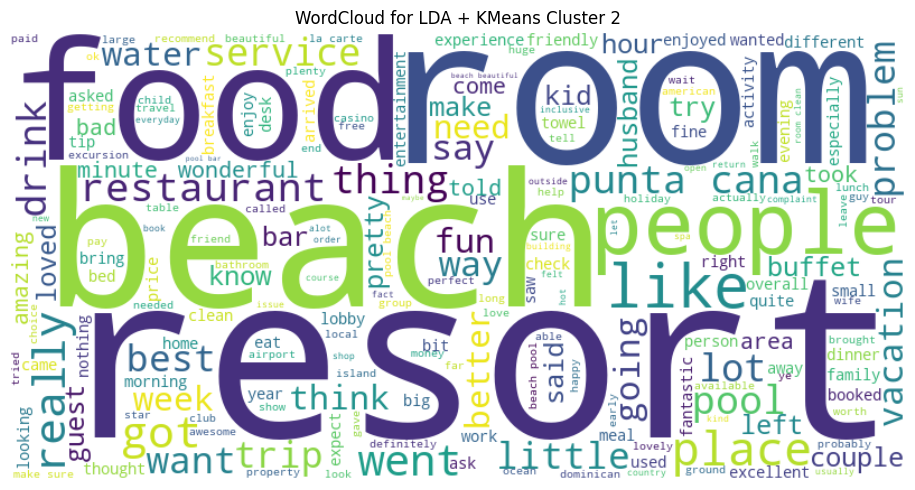

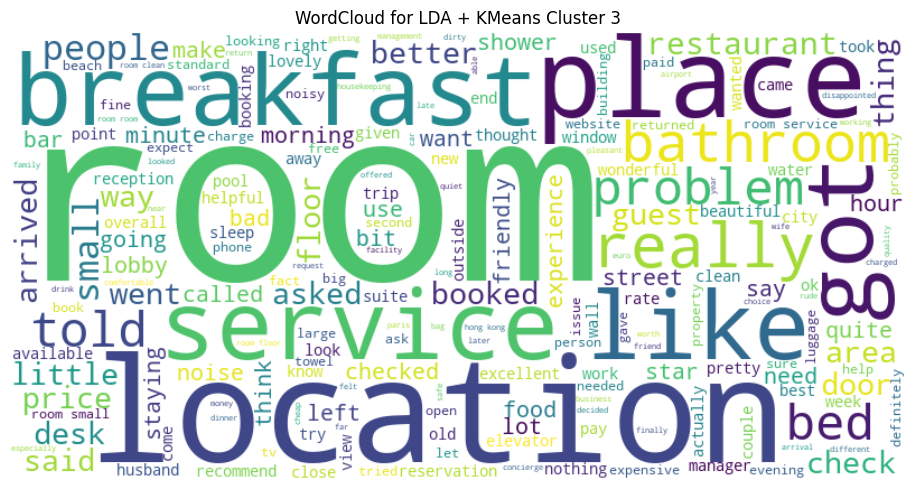

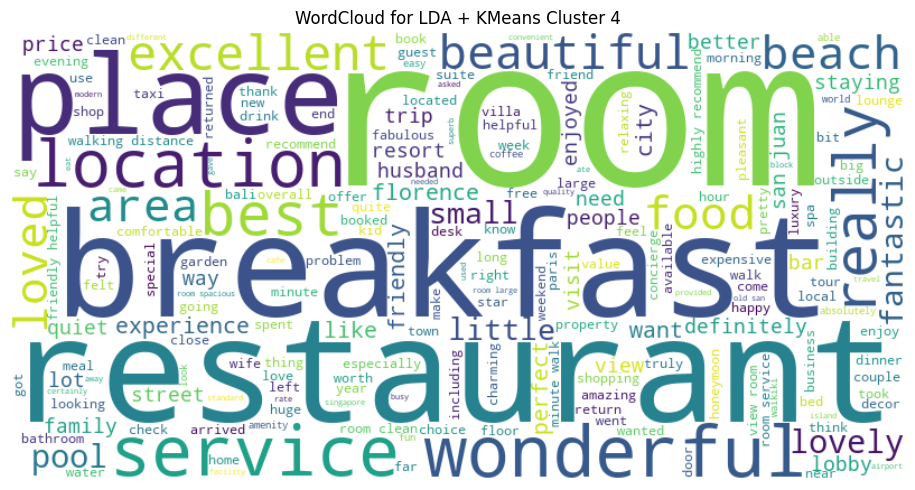

In [87]:
# WordClouds for LDA + KMeans
for i in np.unique(labels_kmeans_lda):
    cluster_reviews = df[labels_kmeans_lda == i]['Cleaned_Review']
    text = " ".join(cluster_reviews)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for LDA + KMeans Cluster {i}')
    plt.tight_layout()
    plt.show()

In [88]:
# Get top words for each cluster
for i in np.unique(labels_kmeans_lda):
    text_cluster = " ".join(df[df['Cluster_LDA_KMeans'] == i]['Cleaned_Review'])

    vec = CountVectorizer(stop_words=list(stop_words), max_features=10)
    vec.fit([text_cluster])
    
    print(f"Top words in LDA + KMeans Cluster {i}: {vec.get_feature_names_out()}")

Top words in LDA + KMeans Cluster 0: ['area' 'bed' 'breakfast' 'clean' 'location' 'place' 'restaurant' 'room'
 'service' 'small']
Top words in LDA + KMeans Cluster 1: ['breakfast' 'city' 'clean' 'excellent' 'friendly' 'helpful' 'location'
 'minute' 'room' 'walk']
Top words in LDA + KMeans Cluster 2: ['beach' 'food' 'like' 'people' 'pool' 'resort' 'restaurant' 'room'
 'service' 'water']
Top words in LDA + KMeans Cluster 3: ['bathroom' 'bed' 'breakfast' 'desk' 'floor' 'like' 'location' 'room'
 'service' 'small']
Top words in LDA + KMeans Cluster 4: ['breakfast' 'clean' 'friendly' 'location' 'place' 'pool' 'restaurant'
 'room' 'service' 'view']


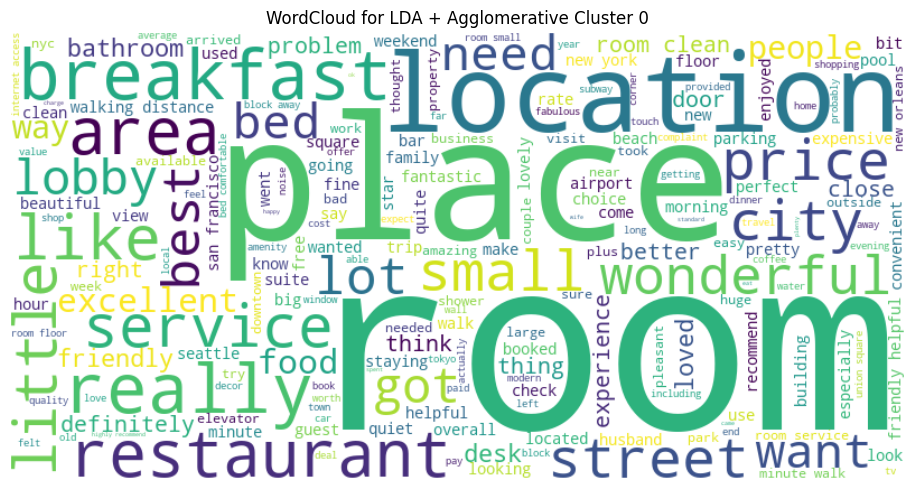

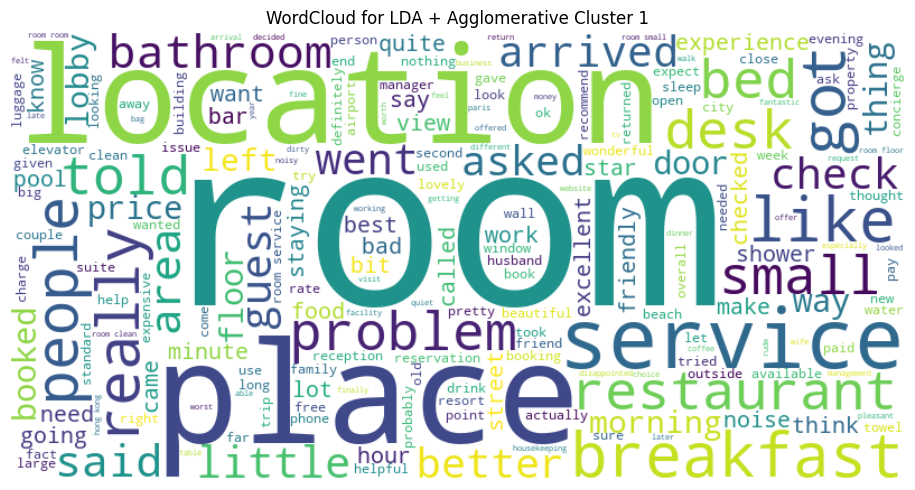

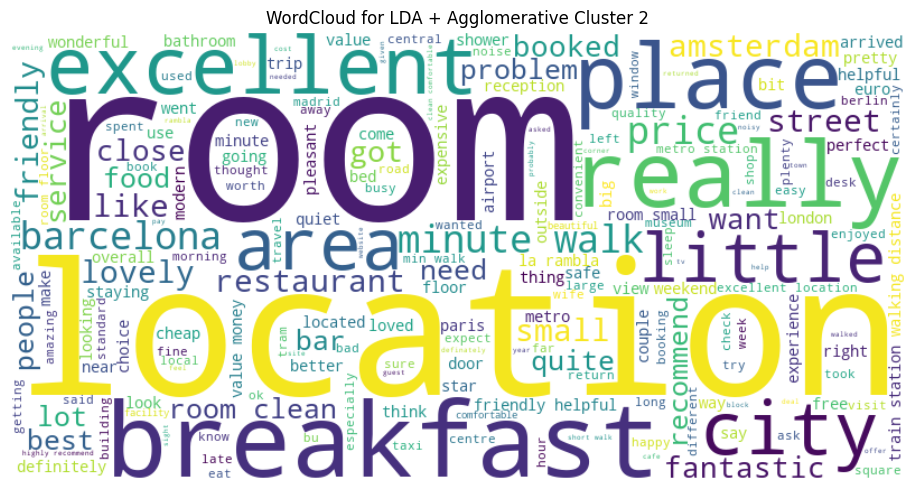

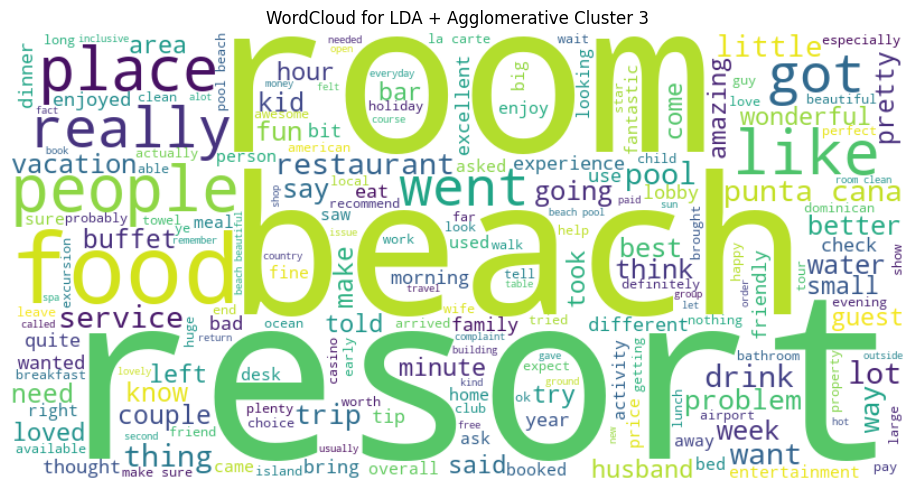

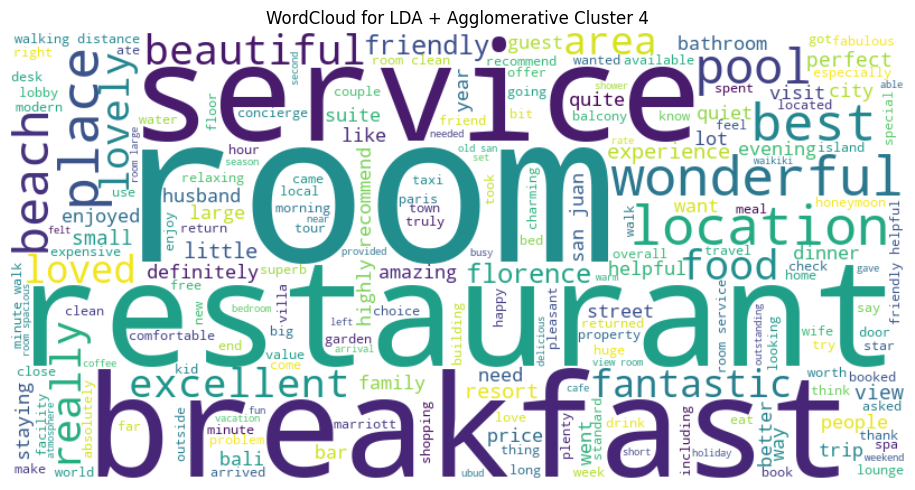

Top words in LDA + Agglomerative Cluster 0: ['area' 'bed' 'breakfast' 'clean' 'location' 'place' 'restaurant' 'room'
 'service' 'small']
Top words in LDA + Agglomerative Cluster 1: ['bathroom' 'bed' 'breakfast' 'desk' 'floor' 'like' 'location' 'room'
 'service' 'small']
Top words in LDA + Agglomerative Cluster 2: ['breakfast' 'city' 'clean' 'excellent' 'friendly' 'helpful' 'location'
 'minute' 'room' 'walk']
Top words in LDA + Agglomerative Cluster 3: ['beach' 'food' 'like' 'people' 'pool' 'resort' 'restaurant' 'room'
 'service' 'water']
Top words in LDA + Agglomerative Cluster 4: ['breakfast' 'friendly' 'location' 'place' 'pool' 'restaurant' 'room'
 'service' 'view' 'wonderful']


In [89]:
# WordClouds for LDA + Agglomerative Clustering
for i in np.unique(labels_agg_lda):
    cluster_reviews = df[labels_agg_lda == i]['Cleaned_Review']
    text = " ".join(cluster_reviews)

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for LDA + Agglomerative Cluster {i}')
    plt.tight_layout()
    plt.show()

# Get top words for each cluster
for i in np.unique(labels_agg_lda):
    text_cluster = " ".join(df[labels_agg_lda == i]['Cleaned_Review'])

    vec = CountVectorizer(stop_words=list(stop_words), max_features=10)
    vec.fit([text_cluster])

    print(f"Top words in LDA + Agglomerative Cluster {i}: {vec.get_feature_names_out()}")

### Cluster Interpretation from Top Words and WordClouds

#### KMeans Clusters:
- **Cluster 0**: Centered around room quality, price, and nearby features (*room*, *location*, *restaurant*, *street*, *area*).
- **Cluster 1**: Reflects positive urban experiences, mentions of *excellent*, *friendly*, and European cities imply **walkable city stays**.
- **Cluster 2**: Focused on tropical **resort vacations**, *beach*, *pool*, *buffet*, and *resort* are dominant.
- **Cluster 3**: Indicates **minor complaints** and service issues, with terms like *problem*, *bathroom*, *desk*, and *noise*.
- **Cluster 4**: Highlights highly positive experiences with words like *wonderful*, *beautiful*, *view*, and *lovely*, possibly tied to **luxury or honeymoon stays**.

#### Agglomerative Clusters:
- **Cluster 0**: Similar to KMeans Cluster 0, focused on standard amenities and **urban travel convenience**.
- **Cluster 1**: Heavily features **negative service experiences** — *asked*, *problem*, *bathroom*, *old*, and *noise*.
- **Cluster 2**: Reflects **city tourism** in European hubs, sharing terms with KMeans Cluster 1.
- **Cluster 3**: Emphasizes **beach and resort travel**, strongly aligned with KMeans Cluster 2.
- **Cluster 4**: Dominated by **expressive, positive words** like *wonderful*, *fantastic*, *beautiful*, and *loved*, suggesting top-tier guest satisfaction.

<hr>

### Top Words in LDA-Based Clusters: KMeans vs Agglomerative Clustering

The top 10 words from each cluster reveal meaningful and consistent themes across both clustering methods, suggesting robust topic-based groupings.

- **Room-related aspects** such as *room*, *service*, *bed*, and *breakfast* dominate all clusters, highlighting their central importance in hotel reviews.
- Words related to **location**, *clean*, and *view* are consistently prominent, emphasizing how crucial environment and hygiene are to guests.
- Both models identify clusters around:
  - **Amenities** like *pool*, *restaurant*, *bar*, and *resort*.
  - **Customer service** through terms like *friendly*, *helpful*, and *staff*.
  - **Tourist environment** with words such as *beach*, *city*, *area*, and *walk*.



- Although **cluster numbering/order** differs between methods, the thematic patterns remain largely similar.
- **KMeans Cluster 1** and **Agglomerative Cluster 2** both emphasize *friendly*, *helpful*, *walk*, and city names like *Barcelona* and *Amsterdam*, indicating clusters focused on urban convenience and service.
- **Agglomerative Cluster 4** includes expressive sentiment words like *wonderful*, *fantastic*, and *beautiful*, hinting at more emotionally positive feedback compared to KMeans clusters.
  
<hr>

Both **KMeans** and **Agglomerative Clustering** successfully segmented hotel reviews into semantically coherent groups. Despite minor differences in cluster labels, the overall themes are consistent:
- **Room and service quality**, **location**, and **cleanliness** are universal concerns.
- **Urban stays**, **resort experiences**, and **positive vs negative service** naturally emerged as distinct review categories.
- KMeans showed slightly **sharper separation** of clusters as confirmed by higher silhouette scores and clearer PCA visualizations.
- The inclusion of named locations (e.g., *Barcelona*, *Amsterdam*, *Punta Cana*) in multiple clusters further validates the model's ability to distinguish between different types of travel contexts.

This interpretation adds qualitative value to the clustering pipeline and confirms that LDA-based features are highly informative for understanding hotel guest experiences.

# Q5. Lexicon-Based Sentiment Analysis Using VADER (NLTK)
This section addresses Question 5 by implementing a lexicon-based sentiment analysis model using the VADER (Valence Aware Dictionary for Sentiment Reasoning) tool from NLTK. The Machine Learning model and Deep Learning model has been implemented in Question 2.

VADER is a rule-based model designed specifically for sentiment analysis on short, informal texts such as reviews, tweets, and social media comments. It uses a predefined sentiment lexicon and rules that consider punctuation, capitalization, degree modifiers, and negations to assign sentiment scores.

In [136]:
# Lexicon-Based Model (e.g., VADER)

nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Make predictions
lexicon_preds = []
for review in df['Review']:
    score = sia.polarity_scores(review)['compound']
    if score >= 0.05:
        lexicon_preds.append(2)  # Positive
    elif score <= -0.05:
        lexicon_preds.append(0)  # Negative
    else:
        lexicon_preds.append(1)  # Neutral

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER Model Results:
               precision    recall  f1-score   support

    Negative       0.83      0.41      0.55      3214
     Neutral       0.14      0.01      0.01      2184
    Positive       0.80      0.99      0.88     15093

    accuracy                           0.80     20491
   macro avg       0.59      0.47      0.48     20491
weighted avg       0.73      0.80      0.74     20491



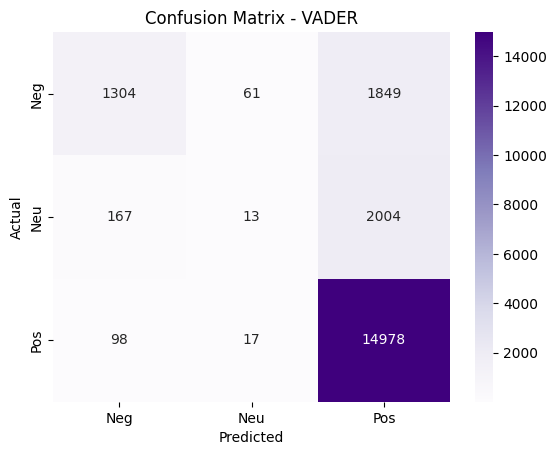

In [137]:
# Metrics and Confusion Matrix for VADER
print("VADER Model Results:\n", classification_report(df['Sentiment'], lexicon_preds, target_names=['Negative', 'Neutral', 'Positive']))
sns.heatmap(confusion_matrix(df['Sentiment'], lexicon_preds), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.title("Confusion Matrix - VADER")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. **Positive Class Dominance**:
   - VADER performs extremely well for **positive sentiment** with a **recall of 0.99** and **F1-score of 0.88**.
   - This is clearly seen in the matrix where **14,978 positive samples** were correctly identified.

2. **Poor Performance for Neutral and Negative**:
   - **Neutral class** shows **very poor recall (0.01)** and **F1-score (0.01)**, indicating that almost all neutral samples were misclassified—mostly as positive.
   - **Negative class** also suffers, with a **recall of only 0.41** and many samples misclassified as **positive** (1,849 instances).

3. **Bias Toward Positive Sentiment**:
   - The model is heavily biased toward predicting the positive class, likely due to:
     - The **distribution of compound scores** in the VADER lexicon,
     - Possible imbalance in the sentiment distribution of the dataset (heavily positive reviews),
     - Lack of contextual understanding (VADER uses word lists and rules, not context-aware deep models).

VADER is a fast and interpretable tool, but its **context-free nature** leads to misclassification—particularly in **subtle or balanced (neutral) reviews**. While it handles strongly polarized positive text well, it **fails in nuanced classification** of negative or neutral sentiment, making it less suitable for real-world applications where accuracy across all classes is crucial.

# Q6. Comparative Report and Discussion

This section summarizes and compares the performance of the models applied across the three major tasks: **Text Classification**, **Clustering**, and **Sentiment Analysis**. The comparison highlights their effectiveness, challenges, and potential use cases.

<hr>


## Summary of Performance Across Tasks

| Task                                | Model / Technique        | Accuracy | Macro F1 | Silhouette Score | Calinski-Harabasz | Davies-Bouldin | Notable Insights |
|-------------------------------------|---------------------------|----------|----------|------------------|-------------------|----------------|------------------|
| Text Classification + Sentiment Analysis | **CNN**                   | 0.96     | 0.96     | –                | –                 | –              | Best performance overall; excellent at identifying all classes, particularly Neutral with F1 = 0.95 |
| Text Classification + Sentiment Analysis | **Logistic Regression**   | 0.91     | 0.91     | –                | –                 | –              | Strong performance and well-balanced; slightly weaker for Neutral (F1 = 0.88) |
| Text Classification + Sentiment Analysis | **BERT**                  | 0.88     | 0.83     | –                | –                 | –              | Good for Positive class (F1 = 0.94); struggles with Neutral (F1 = 0.74) |
| Text Classification + Sentiment Analysis | **VADER (Lexicon-based)** | 0.80     | 0.48     | –                | –                 | –              | Biased toward Positive; fails at Neutral (F1 = 0.01); recall for Negative is low (0.41) |
| Clustering                          | **LDA + KMeans**          | –        | –        | 0.4801           | 18007.6279        | 0.7151         | Best cluster quality across all metrics; well-defined, compact, and distinct clusters |
| Clustering                          | **LDA + Agglomerative**   | –        | –        | 0.4091           | 13352.2827        | 0.8528         | Good cohesion and separation; slightly weaker than KMeans on all metrics |
| Clustering                          | **NMF + KMeans**          | –        | –        | 0.3007           | 8470.7654         | 1.0749         | Lower performance; less compact clusters and poorer separation |
| Clustering                          | **NMF + Agglomerative**   | –        | –        | 0.2364           | 7186.5672         | 1.5570         | Weakest clustering results; high overlap and poor cohesion between clusters |

### Text Classification + Sentiment Analysis

- **CNN** outperformed all other models with the highest **accuracy (0.96)** and **macro F1-score (0.96)**. It demonstrated excellent precision and recall across all sentiment classes, especially for the Neutral class. *Random oversampling* was applied during training to address class imbalance.
- **Logistic Regression** showed strong and balanced performance (**accuracy = 0.91**, **macro F1 = 0.91**), though slightly weaker on the Neutral class (F1 = 0.88). To mitigate class imbalance, **SMOTE (Synthetic Minority Oversampling Technique)** was used.
- **BERT** performed particularly well for the Positive class (F1 = 0.94), but struggled with Neutral (F1 = 0.74). It had an overall **accuracy of 0.88**. To enhance training on limited data, **data augmentation** was applied during preprocessing.
- **VADER**, a lexicon-based method, yielded the weakest results with a **macro F1-score of 0.48**, heavily biased toward Positive sentiment and extremely poor at identifying Neutral (F1 = 0.01).

<hr>


### Clustering

- **LDA + KMeans** was the top performer among clustering models:
  - **Silhouette Score**: 0.4801 (indicating well-separated clusters),
  - **Calinski-Harabasz Index**: 18007.63 (suggesting compact and distinct clusters),
  - **Davies-Bouldin Index**: 0.7151 (lower is better, showing strong performance).
- **LDA + Agglomerative** was the next best, with reasonably good clustering structure but slightly lower quality than KMeans.
- **NMF-based approaches** underperformed across all metrics:
  - Less compact clusters (lower Calinski-Harabasz),
  - More overlapping (higher Davies-Bouldin),
  - Poorer cohesion and separation (Silhouette Score as low as 0.2364 for NMF + Agglomerative).

<hr>




## Bar Plot of Accuracy / Macro F1 per Model

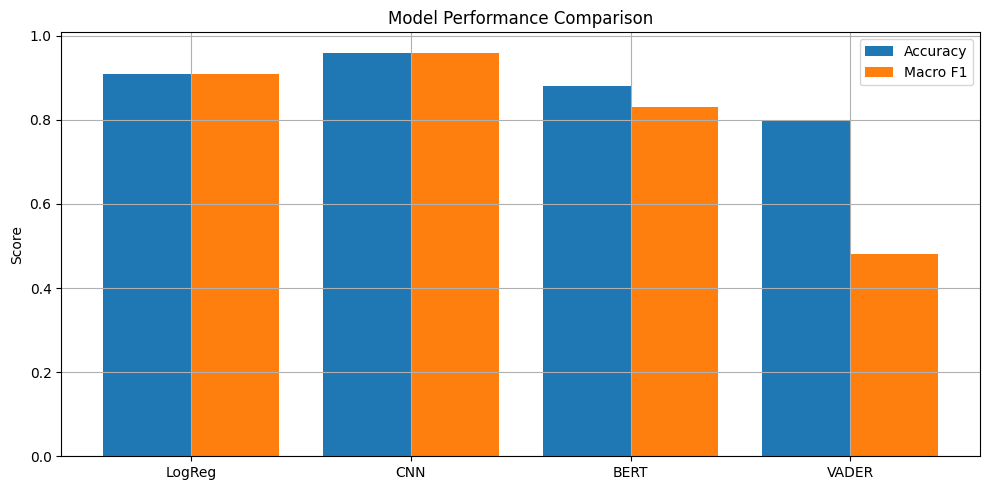

In [128]:
models = ['LogReg', 'CNN', 'BERT', 'VADER']
accuracies = [0.91, 0.96, 0.88, 0.80]
macro_f1s = [0.91, 0.96, 0.83, 0.48]

plt.figure(figsize=(10,5))
x = range(len(models))

plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], macro_f1s, width=0.4, label='Macro F1', align='center')
plt.xticks([i + 0.2 for i in x], models)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- **CNN** outperforms all other models in both metrics indicating excellent performance across all sentiment classes. This suggests strong generalization, likely supported by random oversampling to handle class imbalance and deep learning capabilities.

- **Logistic Regression** shows solid performance. Although slightly behind CNN, it remains a strong baseline model that is computationally efficient and easy to interpret. SMOTE was applied for class balancing.

- **BERT**, despite being a transformer-based model, achieves slightly lower performance than CNN and Logistic Regression. The drop in Macro F1 suggests it struggled more with class imbalance, particularly in the **Neutral** class. Data augmentation was used to help improve generalization but may require a larger dataset for full effectiveness.

- **VADER**, a lexicon-based approach, shows the lowest Macro F1-score, despite relatively high accuracy. This discrepancy is due to its bias toward the **Positive** class and poor performance in detecting **Neutral** and **Negative** sentiments. Its rule-based nature makes it less effective in complex, nuanced reviews.

---

## Silhouette Score Comparison for Clustering

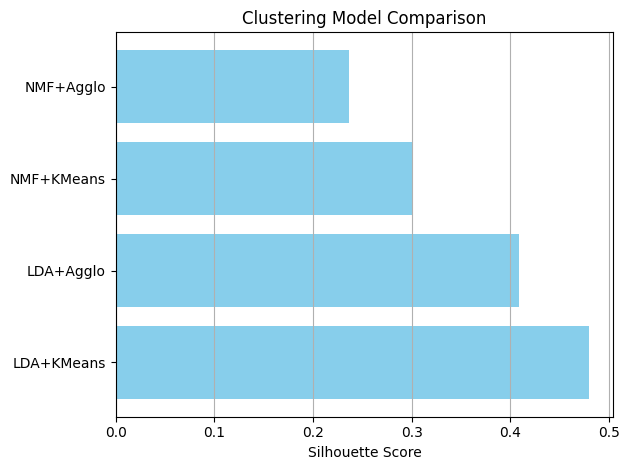

In [138]:
models = ['LDA+KMeans', 'LDA+Agglo', 'NMF+KMeans', 'NMF+Agglo']
scores = [0.4801, 0.4091, 0.3007, 0.2364]

plt.barh(models, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Clustering Model Comparison')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

1. **Best Performing Model**:
   - **LDA + KMeans** achieves the highest silhouette score (**0.4801**), indicating well-separated and cohesive clusters.

2. **Second Best**:
   - **LDA + Agglomerative** comes next with a silhouette score of **0.4091**, also performing reasonably well.

3. **NMF-Based Models Underperform**:
   - **NMF + KMeans**: Score of **0.3007**, suggesting less distinct clusters.
   - **NMF + Agglomerative**: Lowest score at **0.2364**, indicating poorly defined clusters.

#### Interpretation:

- **LDA topics** appear to capture more distinct and meaningful latent features compared to NMF for this dataset, resulting in better clustering.
- **KMeans** generally outperforms Agglomerative clustering across both topic models in terms of silhouette score.

#### Conclusion:

Silhouette score alone suggests that **LDA + KMeans** is the most effective clustering pipeline for this text data. However, for a more comprehensive evaluation, it is essential to use this metric alongside others like the **Calinski-Harabasz Index** and the **Davies-Bouldin Index**, which provide additional insights into cluster compactness and separation.

Both of these supplementary metrics were calculated and visualized in the earlier script and can be referred to for a fuller understanding of the clustering quality across different model combinations.

---
### Model Behavior and Trade-offs

- **CNN**:
  - Achieved the best performance across all classes.
  - Requires more training time and GPU usage than LR but trains faster than BERT. 
  - Generalizes well with class imbalance handling.

- **Logistic Regression**:
  - Simple and fast to train.
  - Performs well on balanced datasets.
  - May underperform with highly contextual data.

- **BERT**:
  - Powerful for understanding complex semantics.
  - Slightly underperformed due to small fine-tuning set.
  - Requires GPU and longer training time (~6 hours).

> Different **class imbalance handling techniques** (SMOTE for LR, oversampling for CNN, and data augmentation for BERT) were applied. While these methods enhanced each model’s performance, they make **direct comparison across models less straightforward**.

> **Note**: While class imbalance handling techniques improved model performance in this controlled evaluation, they may not generalize as effectively to real-world data where natural distributions and linguistic nuances are more varied and less controlled.

- **VADER**:
  - Fast, rule-based and interpretable.
  - Does not require expensive AI computation.
  - Does not handle Neutral well due to lexicon limitation.
  - Not suitable for domain-specific or nuanced texts.

- **Clustering Models**:
  - **LDA + KMeans** provided the most coherent topic-based clusters.
  - **NMF** was less effective; possibly due to sparser topic distributions.

---
### Recommendations

- For **production-ready sentiment classification**, use **CNN** due to its high performance and robustness.
- For **real-time lightweight tasks**, **Logistic Regression** is sufficient and efficient.
- Avoid relying solely on **VADER** for fine-grained sentiment detection in hotel reviews.
- For **unsupervised grouping of reviews**, use **LDA + KMeans**, as it delivers the best cluster cohesion.

---
### Conclusion

- **CNN** is the most suitable for **supervised text classification and sentiment analysis**, offering the most consistent and high-performing results, especially after handling class imbalance.
- **LDA + KMeans** is the best choice for **unsupervised clustering**, providing the most meaningful topic groupings and clear separation.
- **VADER** and **NMF-based clustering models** show limitations in performance and may not be ideal for complex, real-world sentiment and topic modeling tasks.
- **Imbalance-handling techniques** like SMOTE, oversampling, and data augmentation enhance results in controlled experiments, but further validation is needed on naturally distributed and unseen data.